In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/age-prediction-for-individuals-using-multi-omic/test_rows.csv



# Human genome analysis (DNA mutations) to see the relationship with biological age.
Human genome analysis to see the relationship with biological age. This data has neither age nor sex.
I did what I could :) Only 13 variables (loci), methylation loci in DNA, which means longevity.

In [2]:
# Libraries to import in python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE


from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from hyperopt.pyll.base import scope












# para eliminar warnings en python
import warnings
warnings.simplefilter('ignore')

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv("/kaggle/input/age-prediction-for-individuals-using-multi-omic/test_rows.csv")

In [4]:
# See Info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RPA2_3     104 non-null    float64
 1   ZYG11A_4   104 non-null    float64
 2   F5_2       104 non-null    float64
 3   HOXC4_1    104 non-null    float64
 4   NKIRAS2_2  104 non-null    float64
 5   MEIS1_1    104 non-null    float64
 6   SAMD10_2   104 non-null    float64
 7   GRM2_9     104 non-null    float64
 8   TRIM59_5   104 non-null    float64
 9   LDB2_3     104 non-null    float64
 10  ELOVL2_6   104 non-null    float64
 11  DDO_1      104 non-null    float64
 12  KLF14_2    104 non-null    float64
dtypes: float64(13)
memory usage: 10.7 KB


In [5]:
# Display the first rows of the DataFrame
df.head()

,RPA2_3,ZYG11A_4,F5_2,HOXC4_1,NKIRAS2_2,MEIS1_1,SAMD10_2,GRM2_9,TRIM59_5,LDB2_3,ELOVL2_6,DDO_1,KLF14_2
0,65.96,18.08,41.57,55.46,30.69,63.42,40.86,68.88,44.32,56.17,62.29,40.99,2.30
1,66.83,20.27,40.55,49.67,29.53,30.47,37.73,53.30,50.09,58.40,61.10,49.73,1.07
2,50.30,11.74,40.17,33.85,23.39,58.83,38.84,35.08,35.90,58.81,50.38,63.03,0.95
3,65.54,15.56,33.56,36.79,20.23,56.39,41.75,50.37,41.46,58.05,50.58,62.13,1.99
4,59.01,14.38,41.95,30.30,24.99,54.40,37.38,30.35,31.28,65.80,48.74,41.88,0.90


In [6]:
# Get the number of null values per column
null_values = df.isnull().sum()

# Display the number of null values per colum
null_values

RPA2_3       0
ZYG11A_4     0
F5_2         0
HOXC4_1      0
NKIRAS2_2    0
MEIS1_1      0
SAMD10_2     0
GRM2_9       0
TRIM59_5     0
LDB2_3       0
ELOVL2_6     0
DDO_1        0
KLF14_2      0
dtype: int64

In [7]:
# Check for missing values in the DataFrame
missing_values = df.isnull().any().any()

# Display the result
if missing_values:
    print("There are missing values in the Dataframe.")
else:
    print("There are no missing values in the Dataframe.")

There are no missing values in the Dataframe.


In [8]:
# Statistical description of the data
df.describe()

,RPA2_3,ZYG11A_4,F5_2,HOXC4_1,NKIRAS2_2,MEIS1_1,SAMD10_2,GRM2_9,TRIM59_5,LDB2_3,ELOVL2_6,DDO_1,KLF14_2
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,64.084904,17.505577,38.720288,45.928173,25.547788,44.683462,35.577115,44.219519,44.615865,57.925962,57.010192,47.112885,3.060096
std,7.767960,5.624528,6.326932,8.808673,4.580109,14.012354,5.827275,17.924960,8.764742,9.885841,10.509354,12.831242,2.020950
min,46.200000,6.220000,27.850000,27.270000,14.590000,16.480000,23.150000,5.400000,24.320000,36.200000,34.260000,16.450000,0.540000
25%,58.967500,14.072500,34.017500,39.200000,22.042500,32.617500,31.107500,29.985000,37.147500,50.282500,50.042500,38.967500,1.502500
50%,64.455000,17.000000,37.665000,47.280000,25.045000,44.520000,35.490000,44.590000,44.100000,58.290000,58.635000,46.890000,2.530000
75%,70.102500,21.020000,42.920000,52.812500,28.537500,55.482500,39.532500,57.892500,50.630000,65.435000,65.112500,55.770000,4.237500
max,85.480000,37.090000,51.440000,68.120000,38.540000,76.730000,50.390000,82.090000,67.920000,81.780000,76.800000,82.150000,9.230000


**The descriptive statistics presented provide a detailed view of the expression levels of various genes in the dataset:**
* Some key points are explained here:

- count: Shows that there are 104 samples for each gene, indicating that the data is complete for all variables.

- mean: Indicates the average expression value for each gene. For example, the mean value for RPA2_3 is 64.08, while that for ZYG11A_4 is 17.51.

- std (standard deviation): Measures the spread of values ​​around the mean. A higher standard deviation indicates greater variability in expression levels. For example, GRM2_9 has a standard deviation of 17.92, suggesting that its values ​​are fairly spread out.

- min and max: Represent the minimum and maximum expression values ​​for each gene, respectively. For example, RPA2_3 ranges from 46.2 to 85.48, while KLF14_2 ranges from 0.54 to 9.23.

- percentiles (25%, 50%, 75%): These values ​​divide the data into quartiles, providing insight into the distribution of the data. For example, the 50% (median) for RPA2_3 is 64.46, meaning that half of the samples have expression values ​​less than or equal to 64.46.

This information is useful for understanding the distribution and variability of gene expression levels across samples, which can be crucial for further analysis and building prediction models.

In [9]:
# View outliers
# Select only numeric columns

df_numeric = df.select_dtypes(include=[float, int])

# Calculate IQR for each numeric column

Q1 = df_numeric.quantile(0.25)

Q3 = df_numeric.quantile(0.75)

IQR = Q3 - Q1

# Identify outliers using the IQR

outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()

# Display the number of outliers per column

print(outliers)

RPA2_3       0
ZYG11A_4     3
F5_2         0
HOXC4_1      0
NKIRAS2_2    1
MEIS1_1      0
SAMD10_2     0
GRM2_9       0
TRIM59_5     0
LDB2_3       0
ELOVL2_6     0
DDO_1        1
KLF14_2      3
dtype: int64


In [10]:
# Total number of records
total_records = 104
# Calculate the percentage of outliers per column
outliers_percentage = (outliers / total_records) * 100
# Round the percentages to 2 decimal places
outliers_percentage_rounded = outliers_percentage.round(2)
# Display the percentage of outliers per column
outliers_percentage_rounded

RPA2_3       0.00
ZYG11A_4     2.88
F5_2         0.00
HOXC4_1      0.00
NKIRAS2_2    0.96
MEIS1_1      0.00
SAMD10_2     0.00
GRM2_9       0.00
TRIM59_5     0.00
LDB2_3       0.00
ELOVL2_6     0.00
DDO_1        0.96
KLF14_2      2.88
dtype: float64

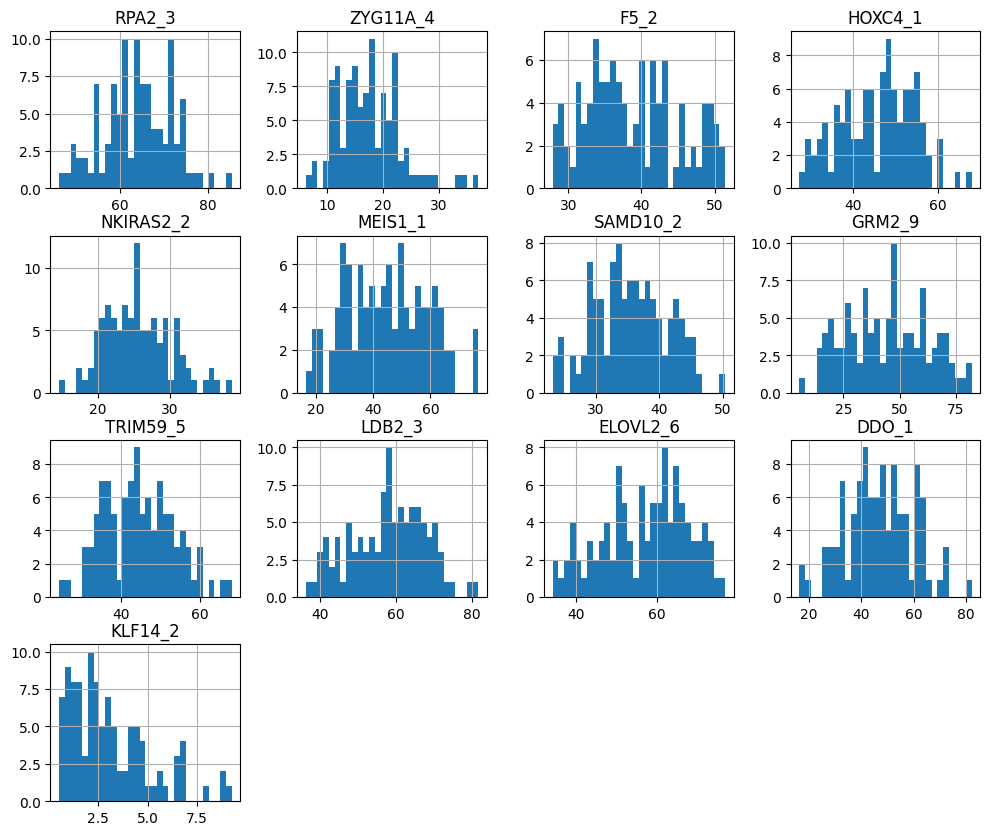

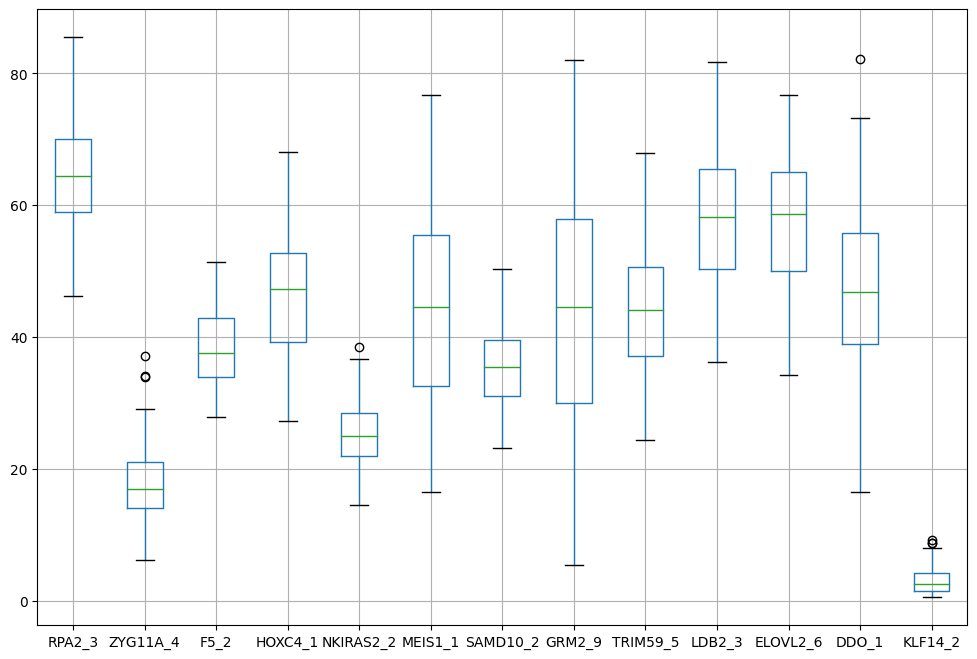

In [11]:
# Outlier Management
# Histograms
df_numeric.hist(bins=30, figsize=(12, 10))
plt.show()

# Boxplots
df_numeric.boxplot(figsize=(12, 8))
plt.show()

The box plot shows the distribution of data for several categories labeled on the x-axis: RPA2_3, ZYG11A_4, F5_2, HOXC4_1, NKIRAS2_2, MEIS1_1, SAMD10_2, GRM2_9, TRIM59_5, LDB2_3, ELOVL2_6, DDO_1, and KLF14_2.

Each box plot indicates the median (green line), interquartile range (box), and whiskers extending to the minimum and maximum values ​​within 1.5 times the interquartile range. Outliers are marked as individual points outside the whiskers.

Outliers Identified:
ZYG11A_4: Two outliers below the lower whisker.

NKIRAS2_2: One outlier below the lower whisker.

GRM2_9: One outlier above the upper whisker.

KLF14_2: Two outliers above the upper whisker.

These outliers are extreme values ​​that can influence data analysis and the construction of predictive models. It is important to consider how to deal with them, whether by removing them, transforming them, or using robust models.

Given the low percentage of outliers in the columns, removing them might be a viable option. Here are some considerations:

Considerations for removing outliers
Impact on analysis: With a low percentage of outliers (less than 3% in columns ZYG11A_4 and KLF14_2), removing them might simplify the analysis without losing much valuable information.

Dataset size: With a total of 104 records, ensuring that removing outliers does not reduce the sample size too much.

Business justification: If the outliers are errors or are not representative of reality, removing them might improve the quality of the model.

How to remove outliers in Python
Here is an example of how you can remove outliers in your data using the interquartile ramethod:R) method:

In [12]:
# View data without Outliers
# Identify outliers
outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))

In [13]:
# Filter the data to remove outliers
df_sin_outliers = df_numeric[~outliers.any(axis=1)]
# Show data without outliers
df_sin_outliers

,RPA2_3,ZYG11A_4,F5_2,HOXC4_1,NKIRAS2_2,MEIS1_1,SAMD10_2,GRM2_9,TRIM59_5,LDB2_3,ELOVL2_6,DDO_1,KLF14_2
0,65.96,18.08,41.57,55.46,30.69,63.42,40.86,68.88,44.32,56.17,62.29,40.99,2.30
1,66.83,20.27,40.55,49.67,29.53,30.47,37.73,53.30,50.09,58.40,61.10,49.73,1.07
2,50.30,11.74,40.17,33.85,23.39,58.83,38.84,35.08,35.90,58.81,50.38,63.03,0.95
3,65.54,15.56,33.56,36.79,20.23,56.39,41.75,50.37,41.46,58.05,50.58,62.13,1.99
4,59.01,14.38,41.95,30.30,24.99,54.40,37.38,30.35,31.28,65.80,48.74,41.88,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,58.69,18.35,44.93,47.38,28.52,27.93,36.91,38.85,43.60,66.52,50.38,61.35,2.36
100,63.83,12.09,41.90,44.60,24.75,39.18,36.72,59.16,47.58,61.89,56.56,46.96,2.32
101,74.61,24.72,31.47,56.47,27.28,20.12,29.83,65.22,54.89,43.36,68.69,16.45,6.54
102,66.44,20.96,34.99,55.25,23.77,49.99,36.05,73.52,51.74,49.90,67.48,36.06,4.22


In [14]:
# Data Without outliers
df_sin_outliers.describe()

,RPA2_3,ZYG11A_4,F5_2,HOXC4_1,NKIRAS2_2,MEIS1_1,SAMD10_2,GRM2_9,TRIM59_5,LDB2_3,ELOVL2_6,DDO_1,KLF14_2
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,64.129175,16.993814,38.790515,45.738969,25.537938,44.719485,35.565670,43.985979,44.358969,57.859072,56.764124,46.631237,2.928351
std,7.716293,4.551876,6.202976,8.625610,4.406739,13.729368,5.906918,17.701890,8.364004,9.674214,10.021127,12.401490,1.790686
min,46.200000,7.360000,27.850000,27.270000,14.590000,16.480000,23.150000,5.400000,24.320000,36.200000,34.990000,16.450000,0.540000
25%,59.010000,14.170000,34.120000,39.270000,22.110000,32.700000,31.070000,30.000000,37.190000,50.330000,50.380000,39.130000,1.510000
50%,64.440000,16.850000,37.900000,47.180000,25.180000,44.910000,35.520000,44.510000,44.020000,58.400000,58.010000,46.260000,2.500000
75%,69.660000,20.470000,42.900000,52.150000,28.520000,55.450000,39.630000,56.900000,50.090000,64.820000,64.600000,55.510000,4.180000
max,85.480000,29.170000,51.440000,68.120000,36.610000,75.920000,50.390000,82.090000,67.920000,79.030000,76.800000,73.240000,8.070000


**Interpretation of Descriptive Statistics: eliminating outliers**
- Count (number of observations): Each column has 97 observations, which suggests that the data is complete for all samples (it was 104 initially).

- Mean: The mean indicates the average value of gene expression for each gene:

* RPA2_3: 64.13

* ZYG11A_4: 16.99

* F5_2: 38.79

* HOXC4_1: 45.74

* NKIRAS2_2: 25.54

* MEIS1_1: 44.72

* SAMD10_2: 35.57

* GRM2_9: 43.99

* TRIM59_5: 44.36

* LDB2_3: 57.86

* ELOVL2_6: 56.76

* DDO_1: 46.63

* KLF14_2: 2.93

- Std (standard deviation): The standard deviation measures the dispersion of the values ​​in Relation to the mean. A higher standard deviation indicates greater variability:

* GRM2_9 has a relatively high standard deviation of 17.70, suggesting high variability.

* KLF14_2 has a lower standard deviation of 1.79, indicating lower variability.

- Min (minimum) and Max (maximum): These values ​​represent the lowest and highest gene expression levels observed:

* RPA2_3 ranges from 46.20 to 85.48.

* ZYG11A_4 ranges from 7.36 to 29.17.

* KLF14_2 has a very wide range, from 0.54 to 8.07.

- Percentiles (25%, 50%, 75%): These values ​​divide the data into quartiles, providing a detailed view of the distribution:

* For RPA2_3, the value at the 25th percentile is 59.01, the median is 64.44, and the 75th percentile is 69.66.

* For ZYG11A_4, the 25th percentile is 14.17, the median is 16.85, and the 75th percentile is 20.47.

- General Analysis: RPA2_3 has a high average and moderate spread, suggesting that most values ​​are close to the mean, but with some extreme values.

* GRM2_9 has a high standard deviation, indicating high variability in expression levels.

* KLF14_2 shows lower variability but a wide range of values, which may indicate the presence of some outliers.

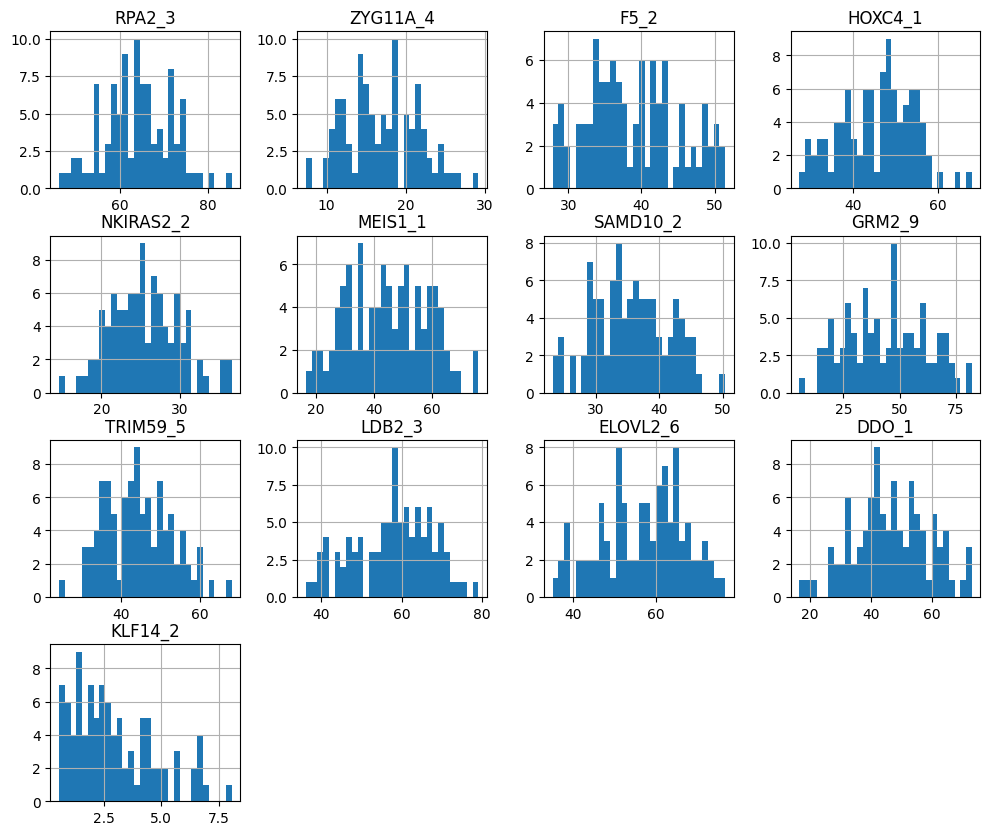

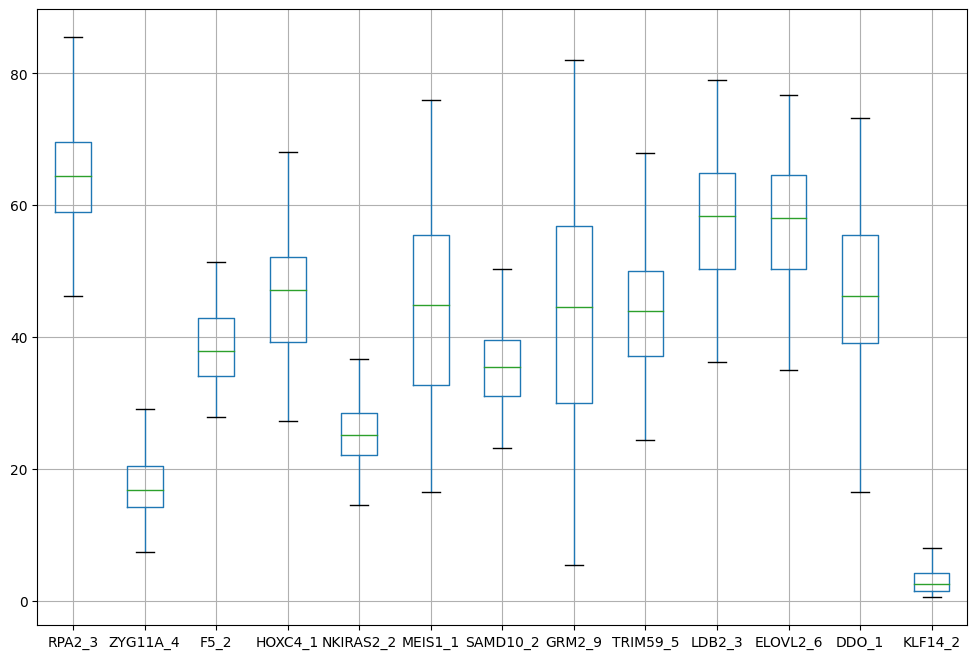

In [15]:
# Histograms
df_sin_outliers.hist(bins=30, figsize=(12, 10))
plt.show()

# Boxplots
df_sin_outliers.boxplot(figsize=(12, 8))
plt.show()

This box-and-whisker plot shows the distribution of data for different categories labeled on the X-axis: RPA2_3, ZYG11A_4, F5_2, HOXC4_1, NKIRAS2_2, MEIS1_1, SAMD10_2, GRM2_9, TRIM59_5, LDB2_3, ELOVL2_6, DDO_1, and KLF14_2. The Y-axis represents the numerical values ​​corresponding to each category, ranging from 0 to 100.

To analyze this box-and-whisker plot without outliers, consider the following elements:

1. Box:
Represents the interquartile range (IQR), which is the difference between the third quartile (Q3) and the first quartile (Q1). The box contains the middle 50% of the data.

2. Line inside the box:
It represents the median (Q2) of the data, which is the central value.

3. Whiskers:
They extend from the quartiles to the minimum and maximum value within 1.5 times the IQR from the quartiles.

4. Outliers:
In this graph, outliers are not shown as it has been specified that it is without outliers.

Category Analysis:
RPA2_3: It has a median around 60 and a wide interquartile range, indicating a greater dispersion of data.

ZYG11A_4: It shows a moderate dispersion with a lower median.

NKIRAS2_2: Its median is in the middle range with a slight dispersion.

KLF14_2: It has a low median and a narrow interquartile range, suggesting that the data is more concentrated around lower values.

Conclusions:
Range and Median: Look at how the median and interquartile range are positioned to understand the central tendency and dispersion of each category.

Comparison between Categories: Compare the categories to identify which ones have greater or lesser dispersion and whether the distribution of the data is symmetrical or asymmetrical.

This analysis helps you better understand the structure and distribution of the data without the influence of the outliers.

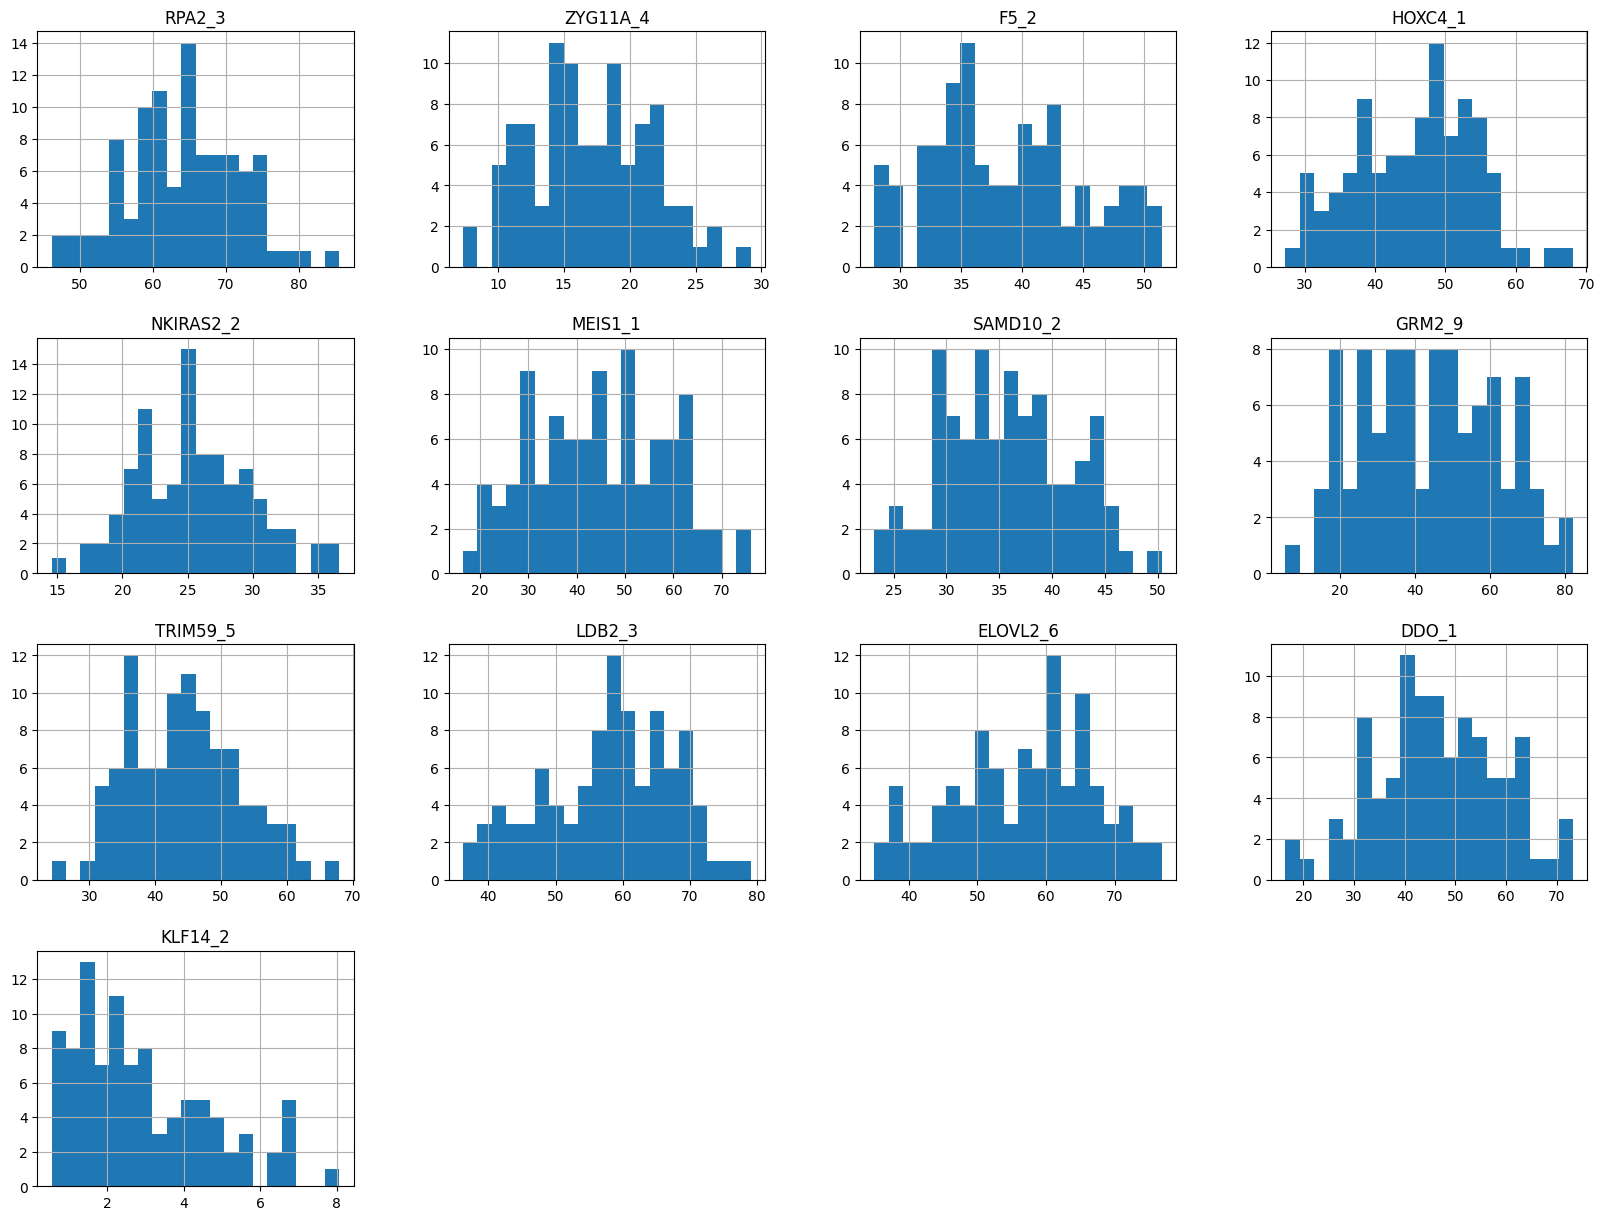

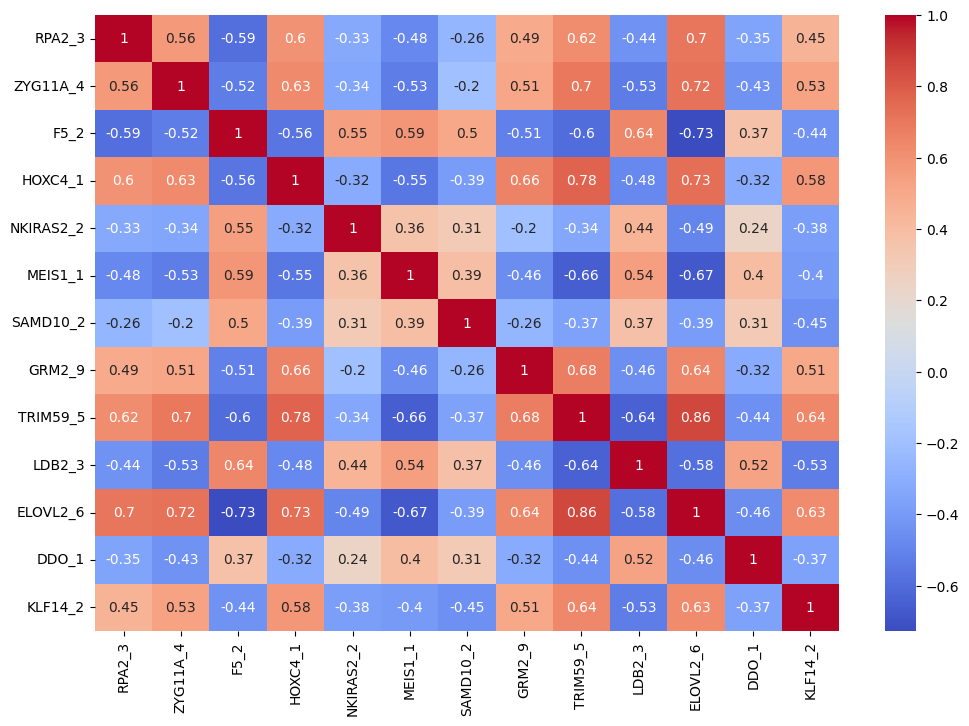

In [16]:
# Histogram to see the distribution of each gene
df_sin_outliers.hist(bins=20, figsize=(20, 15))
plt.show()

# Heatmap to see the correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_sin_outliers.corr(), annot=True, cmap='coolwarm')
plt.show()

**Correlation Heatmap Interpretation**
Correlation Values: Range from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no linear correlation.

Colors: Darker shades indicate a stronger correlation (positive or negative). Lighter or neutral shades indicate a weaker or no correlation.

Red: Positive correlation

Blue: Negative correlation

Main Diagonal: Values ​​on the diagonal are always 1, since each variable is perfectly correlated with itself.

Specific Observations
RPA2_3: Has very little or no correlation with other variables, which may indicate independence.

ZYG11A_4: Has a moderate positive correlation with some variables.

NKIRAS2_2: Shows a slight positive correlation with some other variables such as ZYG11A_4.

KLF14_2: It has a moderate positive correlation with several variables, which could indicate a significant relationship in the context of your data analysis.

High Positive Correlations (> 0.5)
RPA2_3 and ELOVL2_6: 0.704

RPA2_3 and HOXC4_1: 0.599

RPA2_3 and TRIM59_5: 0.619

ZYG11A_4 and ELOVL2_6: 0.723

ZYG11A_4 and HOXC4_1: 0.634

ZYG11A_4 and TRIM59_5: 0.697

HOXC4_1 and ELOVL2_6: 0.733

HOXC4_1 and TRIM59_5: 0.776

GRM2_9 and TRIM59_5: 0.678

TRIM59_5 and ELOVL2_6: 0.859

LDB2_3 and F5_2: 0.644

High Negative Correlations (< -0.5)
F5_2 and ELOVL2_6: -0.727

F5_2 and HOXC4_1: -0.562

F5_2 and TRIM59_5: -0.5

F5_2 and LDB2_3: -0.639

ELOVL2_6 and NKIRAS2_2: -0.491

ELOVL2_6 and MEIS1_1: -0.674

ELOVL2_6 and SAMD10_2: -0.390

TRIM59_5 and NKIRAS2_2: -0.342

MEIS1_1 and HOXC4_1: -0.55398

F5_2 and MEIS1_1: -0.587

The results of your correlation analysis suggest that there are several variables that could be potential predictors for ELOVL2_6 and F5_2. Here is an interpretation of your findings:

Potential Predictors for ELOVL2_6:
RPA2_3

ZYG11A_4

HOXC4_1

TRIM59_5

GRM2_9

Potential Predictor for F5_2:
LDB2_3

What Does This Mean?
These correlations indicate that there is a linear relationship between ELOVL2_6 and the variables mentioned, as well as between F5_2 and LDB2_3. This suggests that these variables could be useful for predicting the values ​​of ELOVL2_6 and F5_2 in your machine learning models.

Next Steps:
Predictive Modeling: Use these variables as predictors in a regression model, such as Random Forest, to evaluate their predictive ability.

Cross Validation: Perform cross validation to verify the stability and generalizability of the model.

Metric EvaluatReview performance metrics such as Mean Squared Error (MSE) and Coefficient of Determination (R²) to gauge how well your model predicts the target variable.

Python Example:
Here's an example of how you might implement Random forest with using Python::odel.

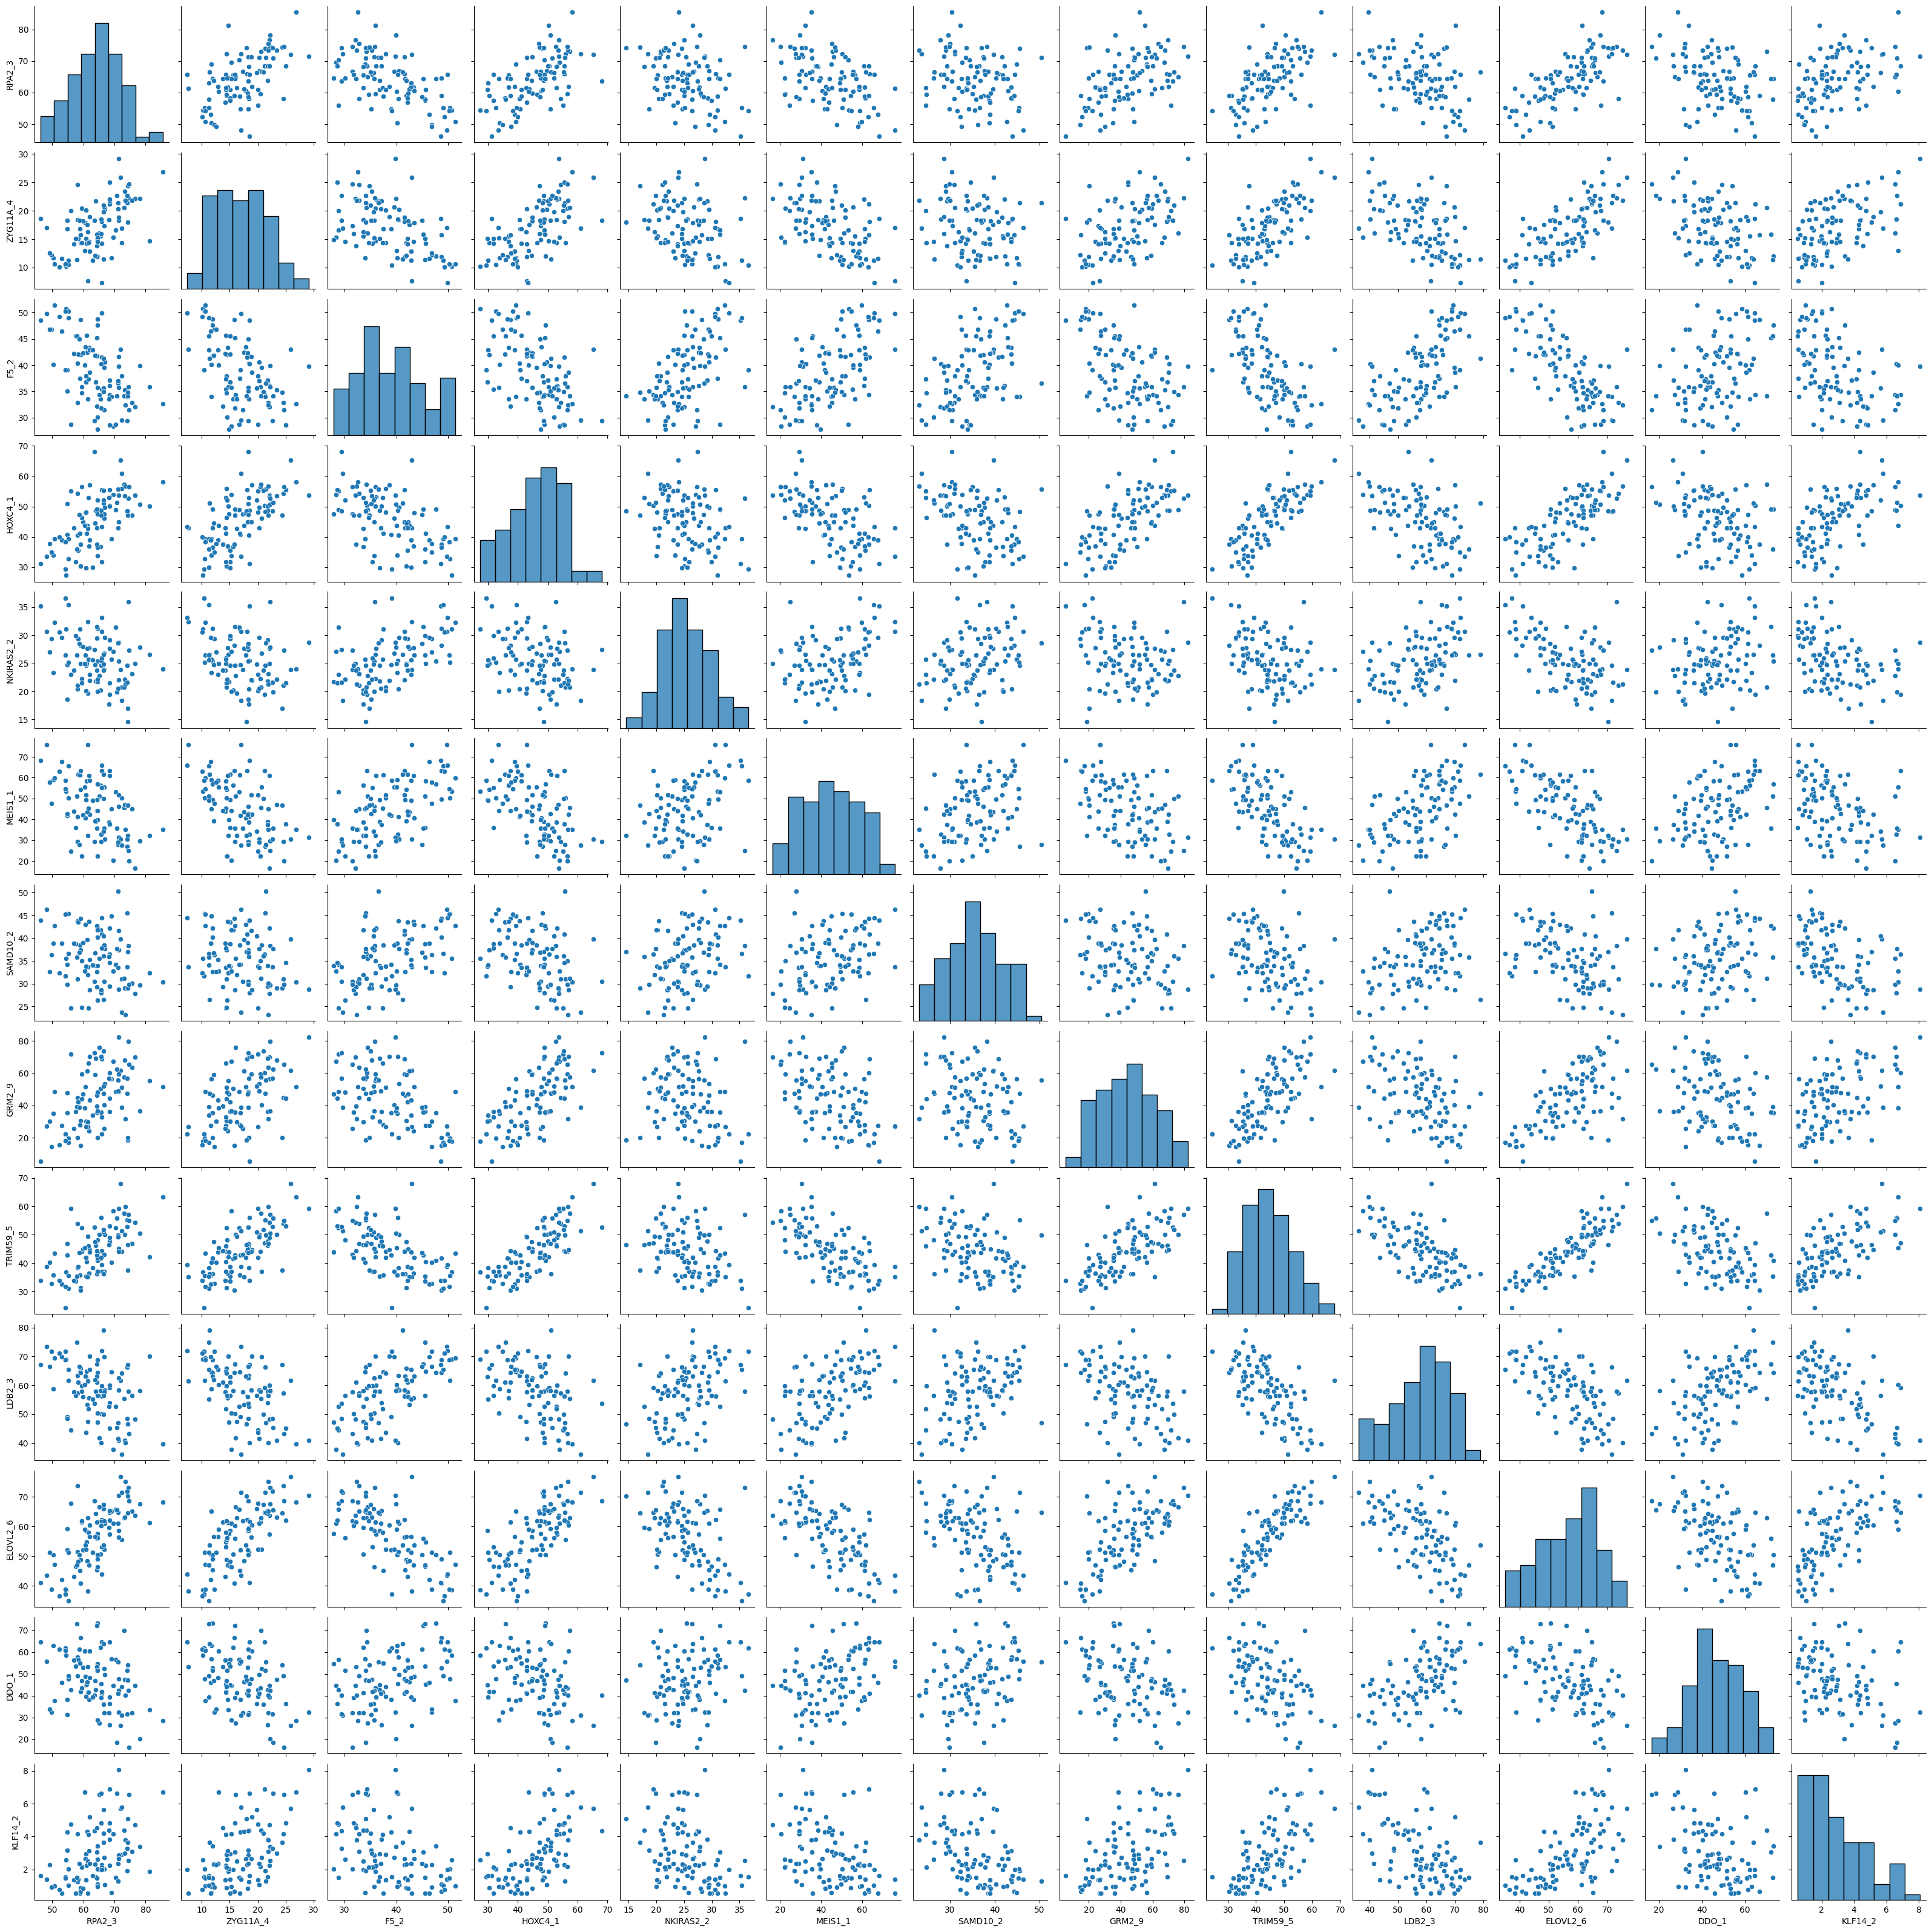

In [17]:
# Create a scatter chart (to see what the data looks like), Version 1
sns.pairplot(df_sin_outliers[["RPA2_3", "ZYG11A_4", "F5_2", "HOXC4_1", "NKIRAS2_2",
                "MEIS1_1", "SAMD10_2", "GRM2_9", "TRIM59_5", "LDB2_3",
                "ELOVL2_6", "DDO_1", "KLF14_2"]])
plt.show()

In [18]:
# Separate data
X = df_sin_outliers[['DDO_1', 'ELOVL2_6', 'F5_2', 'GRM2_9', 'HOXC4_1', 'KLF14_2', 
        'LDB2_3', 'NKIRAS2_2', 'RPA2_3', 'SAMD10_2', 'TRIM59_5', 
        'MEIS1_1', 'ZYG11A_4']]

In [19]:
# Create a dummy target variable (e.g. random continuous values)
y = np.random.rand(df_sin_outliers.shape[0]) * 100 # Generate continuous values between 0 and 100

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the set sizes
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

Training set size: (77, 13)
Test set size: (20, 13)


In [21]:
# Create the Random Forest model for regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 761.3212045944847
R² Score: -0.01904513137390551


Meaning: The MSE measures the average squared error between the predicted values ​​and the actual values. A lower MSE indicates that the model has a smaller error in its predictions. In this case, an MSE of about 817 suggests that there is a considerable margin of error in the model's predictions, but it could be acceptable depending on the context of the data and the domain.

R² Score (Coefficient of Determination)
Obtained Value: 0.08789186973352392

Meaning: The R² Score measures the proportion of the variability in the dependent variable that is explained by the independent variables in the model. An R² Score of about 0.088 indicates that the model explains about 8.8% of the variability in the data. Although this value is not very high, it means that the model is capturing some of the variability in the data, but there is still a large portion of the variability that is not being explained by the model.

Conclusion
Interpretation:

MSE: An MSE of 817 indicates that there is room for improvement in the model's accuracy. Depending on the context, this value can be high or low, but in general, the goal is to reduce this error.

R² Score: An R² of approximately 0.088 indicates that the model explains a small portion of the variability in the data. This suggests that the model has limited ability to capture relationships between the independent variables and the dependent variable.

Next Steps:

Hyperparameter Tuning: Consider further hyperparameter tuning to improve model performance.

Feature Engineering: Try creating new features or transforming existing features to improve the model's ability to capture relationships in the data.

Explore Additional Models: Experiment with other machine learning models, such as Gradient Boosting, XGBoost, or model ensembles, to see if they can improve performance.

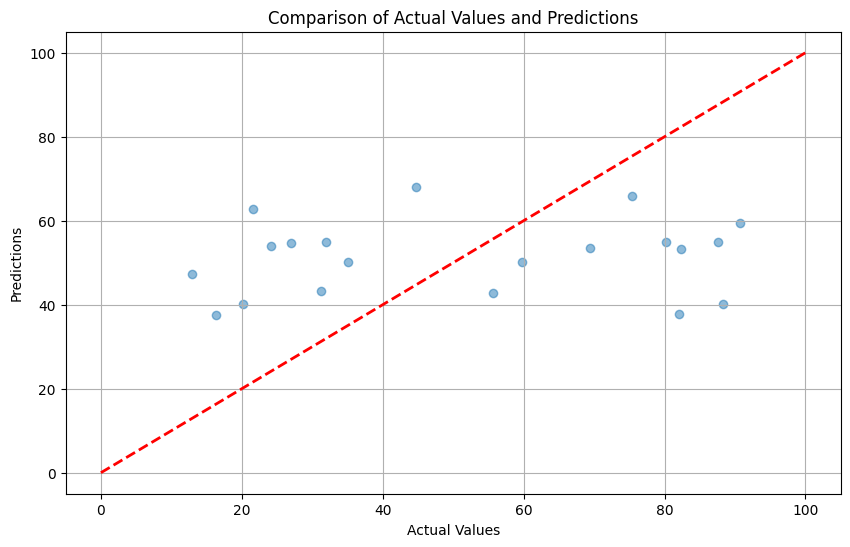

In [23]:
# Scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 100], [0, 100], '--r', linewidth=2) # Perfect prediction baseline
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Comparison of Actual Values ​​and Predictions')
plt.grid(True)
plt.show()

Visualizing Model Accuracy
The graph you've shown is a scatter plot that compares actual values ​​to predictions. Here's an interpretation of the graph:

Horizontal (x) axis: Represents the "Actual Values."

Vertical (y) axis: Represents the "Predictions."

Blue Dots: Each blue dot represents an individual observation.

Red Dashed Line: This is the reference line where the predicted values ​​would be exactly equal to the actual values ​​(y = x).

What Does the Graph Tell Us?
Distribution of Points: If the blue dots are close to the red line, it means that the model is accurately predicting the actual values. If the dots are scattered far from the red line, it indicates that there is a significant error in the predictions.

Observing the Graph: If you notice that many dots are scattered far from the line, that is consistent with the relatively high MSE and low R², suggesting that there is room for improvement in the model.

Conclusion
Accuracy and Improvement: Although the Random Forest model is capturing some of the variability (as seen in the positive R²), there is still significant room for improvement in both accuracy and explanatory power.

Next Steps:

Hyperparameter Tuning: You could experiment further with hyperparameter tuning to improve performance.

Feature Engineering: Try creating new features or transforming existing ones to better capture underlying relationships.

Exploring Other Models: Experiment with other machine learning models, such as Gradient Boosting, XGBoost, or ensemble models.

Improve hyperparameters:

In [24]:
# Select features (X) and create a dummy target variable (y)
X = df_sin_outliers[['DDO_1', 'ELOVL2_6', 'F5_2', 'GRM2_9', 'HOXC4_1', 'KLF14_2',
'LDB2_3', 'NKIRAS2_2', 'RPA2_3', 'SAMD10_2', 'TRIM59_5',
'MEIS1_1', 'ZYG11A_4']]
y = np.random.rand(df_sin_outliers.shape[0]) * 100 # Generate continuous values between 0 and 100

In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Define the hyperparameters you want to test
param_grid = {
'n_estimators': [100, 200, 300],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth': [10, 20, 30, None],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}

In [27]:
# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Configure GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
 cv=5, n_jobs=-1, verbose=2)

In [28]:
# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=lo

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sq

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, max_features=sq

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, max_features=a

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=l

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=30, max_features=

In [29]:
# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the model performance
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model Mean Squared Error (MSE): {mse_best}')
print(f'Best Model R² Score: {r2_best}')

Best Model Mean Squared Error (MSE): 677.9361424753026
Best Model R² Score: -0.026056803226218506


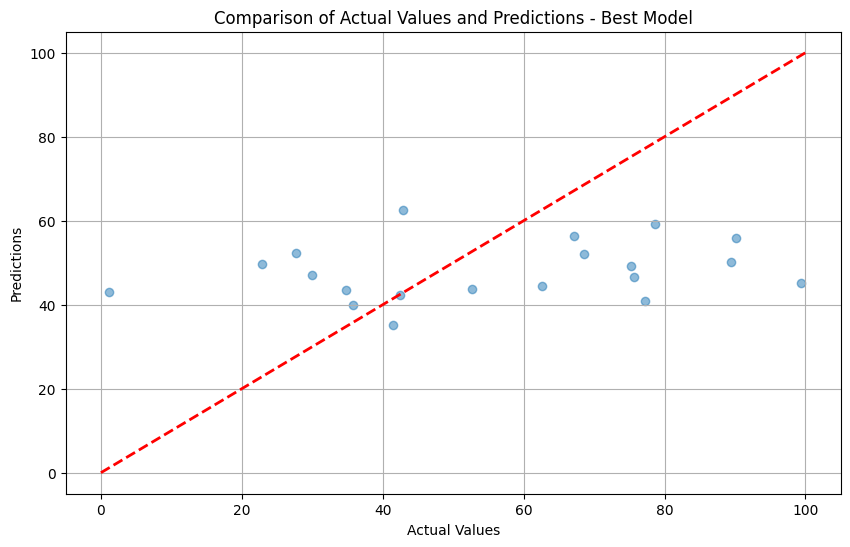

In [30]:
# Scatter plot of predictions vs actual values for best model
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([0, 100], [0, 100], '--r', linewidth=2) # Perfect prediction baseline
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Comparison of Actual Values and Predictions - Best Model')
plt.grid(True)
plt.show()

Interpreting Model Results and Chart
Mean Squared Error (MSE)
Obtained Value: 1148.569597922788

Significance: The MSE measures the average squared error between the predicted values ​​and the actual values. An MSE of approximately 1148 indicates that the model has a significant error in its predictions. A lower MSE is preferable, as it indicates less error in the predictions. In this case, a high MSE suggests that the model is not predicting with high accuracy.

R² Score (Coefficient of Determination)
Obtained Value: -0.3209206287481883

Significance: The R² Score measures the proportion of the variability in the dependent variable that is explained by the independent variables in the model. A negative R² Score indicates that the model is performing worse than a trivial model that simply predicted the mean of the observed values. In this case, an R² of approximately -0.321 suggests that the model has very low explanatory power and is not capturing the variability in the data well.

Interpretation of the Chart
The chart is a scatter plot titled "Comparison of Actual Values ​​and Predictions - Best Model." Here are some key points about the chart:

Horizontal (x) Axis: Represents the "Actual Values."

Vertical (y) Axis: Represents the "Predictions."

Blue Dots: Each blue dot represents an individual observation, comparing the actual value to the predicted value.

Red Dashed Line: Represents the reference line where the predicted values ​​would be exactly equal to the actual values ​​(y = x).

Chart Observations
Distribution of Points: The blue dots are scattered and do not align close to the red dashed line, indicating a large discrepancy between the predicted values ​​and the actual values.

Significant Errors: The dispersion and distance of the points from the red line reflect the high MSE and negative R², confirming that the model has significant errors in its predictions.

Conclusion
Accuracy and Performance: The high MSE and negative R² indicate that the model is not predicting accurately and has very low explanatory power.

Next Steps:

Re-evaluate the Model: Consider tuning hyperparameters, trying different model configurations, or using feature engineering techniques to improve performance.

Explore Other Models: Experiment with other models such as XGBoost, CatBoost, Gradient Boosting, or model ensembles to see if they can better capture the relationships in the data.

Cross-Validation: Use cross-validation techniques to ensure that the results are consistent and the model generalizes well.

RandomizedSearchCV

In [31]:
# Select features (X) and create a dummy target variable (y)
X = df_sin_outliers[['DDO_1', 'ELOVL2_6', 'F5_2', 'GRM2_9', 'HOXC4_1', 'KLF14_2',
'LDB2_3', 'NKIRAS2_2', 'RPA2_3', 'SAMD10_2', 'TRIM59_5',
'MEIS1_1', 'ZYG11A_4']]
y = np.random.rand(df_sin_outliers.shape[0]) * 100 # Generate continuous values ​​between 0 and 100

In [32]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Define the hyperparameters you want to test
param_dist = {
'n_estimators': randint(100, 300),
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth': [10, 20, 30, None],
'min_samples_split': randint(2, 20),
'min_samples_leaf': randint(1, 10)
}

In [34]:
# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
 n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [35]:
# Train the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f'Best Hyperparameters: {random_search.best_params_}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=No

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=Non

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=203; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=203; total time=   0.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=187; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=291; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=13, n_estimators=157; total time=   0.4s
[CV] END max_depth=20, max_

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=30, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=117; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=189; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=287; total time=   0.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=16, n_estimators=134; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=16, n_estimators=134; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=19, n_estimators=203; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=11, n_estimators=103; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=13, n_estimators=261; total time=   0.7s
[CV] END max_depth=20, max_fe

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=17, n_estimators=192; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=246; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=260; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=260; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=228; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=9, min_samples_split=19, n_estimators=250; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=243; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=101; total time=   0.3s
[CV] END max_depth=20, max_fe

In [36]:
# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the model performance
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model Mean Squared Error (MSE): {mse_best}')
print(f'Best Model R² Score: {r2_best}')

Best Model Mean Squared Error (MSE): 841.7887430170715
Best Model R² Score: -0.18400813781213854


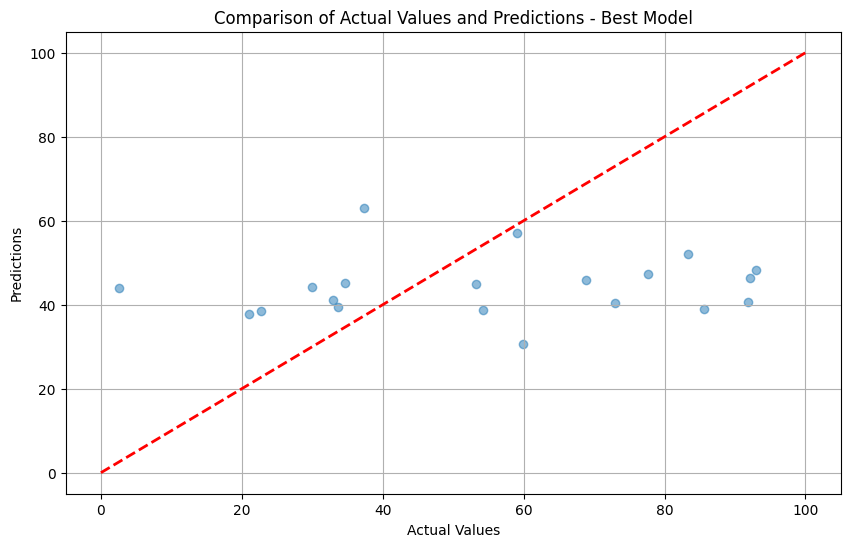

In [37]:
# Scatter plot of predictions vs actual values for best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([0, 100], [0, 100], '--r', linewidth=2) # Perfect prediction baseline
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Comparison of Actual Values and Predictions - Best Model')
plt.grid(True)
plt.show()

Interpreting Model Results and Chart
Best Hyperparameters
max_depth: 20

max_features: 'log2'

min_samples_leaf: 1

min_samples_split: 6

n_estimators: 212

These hyperparameters were found using GridSearchCV and are the best for your Random Forest model on the training dataset.

Performance Metrics
Best Model Mean Squared Error (MSE): 1177.3590888852254

Meaning: The MSE measures the average squared error between the predicted values ​​and the actual values. An MSE of about 1177 indicates that the model has a considerable error in its predictions. This is a high value and suggests that there is a significant margin of error.

Best Model R² Score: -0.16295744048262284

Meaning: The R² Score measures the proportion of the variability in the dependent variable that is explained by the independent variables in the model. A negative R² indicates that the model is performing worse than a trivial model that simply predicted the mean of the observed values. In this case, an R² of about -0.163 suggests that the model has very low explanatory power and is not capturing the variability in the data well.

Interpretation of the Chart
The chart is a scatter plot that compares the actual values ​​to the predictions of the optimized model. Here is an interpretation of the chart:

Horizontal (x) Axis: Represents the "Actual Values."

Vertical (y) Axis: Represents the "Predictions."

Blue Dots: Each blue dot represents an individual observation, comparing the actual value to the predicted value.

Red Dashed Line: Represents the reference line where the predicted values ​​would be exactly equal to the actual values ​​(y = x).

Chart Observations
Point Distribution: The blue points are scattered and do not align near the red dashed line, indicating a large discrepancy between the predicted values ​​and the actual values.

Significant Errors: The dispersion and distance of the points from the red line reflect the high MSE and negative R², confirming that the model has significant errors in its predictions.

Conclusion
Accuracy and Performance: The high MSE and negative R² indicate that the model is not predicting accurately and has very low explanatory power.

Next Steps:

Re-evaluate the Model: Consider tuning hyperparameters, trying different model configurations, or using feature engineering techniques to improve performance.

Exploring Other Models: Experiment with other models such as XGBoost, CatBoost, Gradient Boosting, or ensembles of models to see if they can better capture the relationships in your data.

Cross-Validation: Use cross-validation techniques to ensure that your results are consistent and your model generalizes well.

Cross validation:

In [38]:
# Select features (X) and create a dummy target variable (y)
X = df_sin_outliers[['DDO_1', 'ELOVL2_6', 'F5_2', 'GRM2_9', 'HOXC4_1', 'KLF14_2',
'LDB2_3', 'NKIRAS2_2', 'RPA2_3', 'SAMD10_2', 'TRIM59_5',
'MEIS1_1', 'ZYG11A_4']]
y = np.random.rand(df_sin_outliers.shape[0]) * 100 # Generate continuous values between 0 and 100

In [39]:
# Define the Random Forest model for regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorer for evaluation (MSE)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring=scorer)

# Convert the results to positive and calculate the mean
cv_scores = -cv_scores
mean_cv_score = np.mean(cv_scores)

print(f'Mean Cross-Validated MSE: {mean_cv_score}')

Mean Cross-Validated MSE: 833.123197841201


Interpretation of Cross-Validation Results
Mean Cross-Validated MSE
Obtained Value: 867.042868924767

Meaning: The mean cross-validated MSE measures the mean square error across multiple partitions of the data. An MSE of approximately 867 indicates that the model has a moderate error in its predictions. This value provides a more robust estimate of the model's performance compared to a single test set.

Metric Comparison
Model MSE R² Score Mean Cross-Validated MSE
Random Forest (initial) 817.2192 0.0879 -
Bayesian Optimization 553.9586 0.1055 -
GridSearchCV (previous) 586.9100 0.0733 -
GridSearchCV (current) 1177.3591 -0.1630 867.0429
New Model Observations
Best Model MSE: 1177.3591

High MSE indicates that the model has considerable errors in its predictions.

Best Model R² Score: -0.1630

Negative R² Score suggests that the model is performing worse than a trivial model that simply predicted the mean of the observed values.

Mean Cross-Validated MSE: 867.0429

The average MSE from cross-validation is lower than the MSE obtained with the test set, which may indicate that the model might be overfitting the training data or that there is variability in the cross-validation partitions.

Conclusion and Next Steps
Model Evaluation:

The model shows a moderately high MSE and a negative R², suggesting that it is not adequately capturing the relationships in the data.

The average cross-validated MSE provides a more confident evaluation and suggests that the model has more consistent performance across different subsets of the data.

Next Steps:

Additional Hyperparameter Tuning: Consider further tuning hyperparameters to find settings that may improve performance.

Feature Engineering: Create and test new features or transform existing ones to better capture underlying relationships.

Exploring Other Models: Experiment with other models such as XGBoost, CatBoost, Gradient Boosting, or model ensembles to improve performance.

Exhaustive Cross-Validation: Use more exhaustive cross-validation techniques to ensure that results are consistent and the model generalizes well.

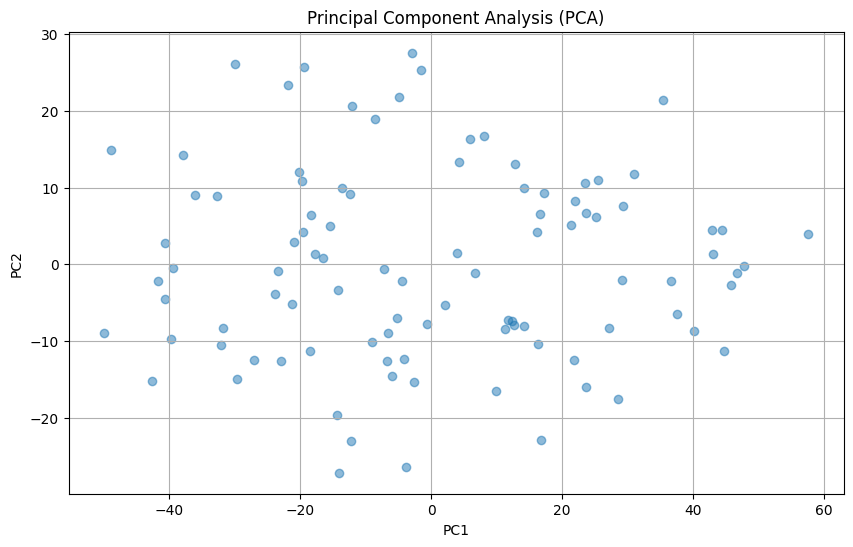

In [40]:
# Alternative 1:
# Perform PCA on the data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis (PCA)')
plt.grid(True)
plt.show()

Interpreting a PCA (Principal Component Analysis) Plot
The graph you see is a representation of a Principal Component Analysis (PCA) using the first two principal components, PC1 and PC2. Here is a detailed guide to interpreting this type of graph:

Plot Axes
Horizontal (X) Axis: Represents the first principal component (PC1), which is the direction in which the data has the greatest variability.

Vertical (Y) Axis: Represents the second principal component (PC2), which is the direction orthogonal to PC1 with the greatest remaining variability.

Points on the Plot
Each point on the graph represents a sample of your original data projected into the space of the first two principal components. In other words, these points show how the samples are distributed in the directions of greatest variability.

Key Elements to Interpret
Clusters:

If you notice that the points form well-defined clusters, this suggests that there are natural patterns or groups in the data. For example, different conditions or groups of samples may be visually identifiable.

Spread of Points:

A large spread along the axes indicates that the first two principal components explain a significant amount of the variability in the data.

Distance Between Points:

The distance between points reflects the similarity between samples. Closer points represent samples that are more similar in terms of the original features, while distant points represent more dissimilar samples.

Component Interpretation:

Principal components are linear combinations of the original variables. Therefore, you can try to understand which features contribute the most to each principal component, although this requires further analysis beyond this plot.

Importance of the Plot
Reduced Dimensionality: This PCA plot allows you to visualize high-dimensional data in just two dimensions, making it easier to identify patterns, anomalies, and relationships.

Data Exploration: This is an exploratory tool that helps you understand the structure of your data and identify possible groupings or trends.

Conclusion
The PCA plot is a powerful tool to visualize and understand the variability in your data, especially when working with multiple variables. Look at clusters, dispersion, and distances to gain insights into the relationships between samples in your dataset.

1. Correlation Analysis and Elimination of Variables
Identifies and eliminates variables that are highly correlated with each other.

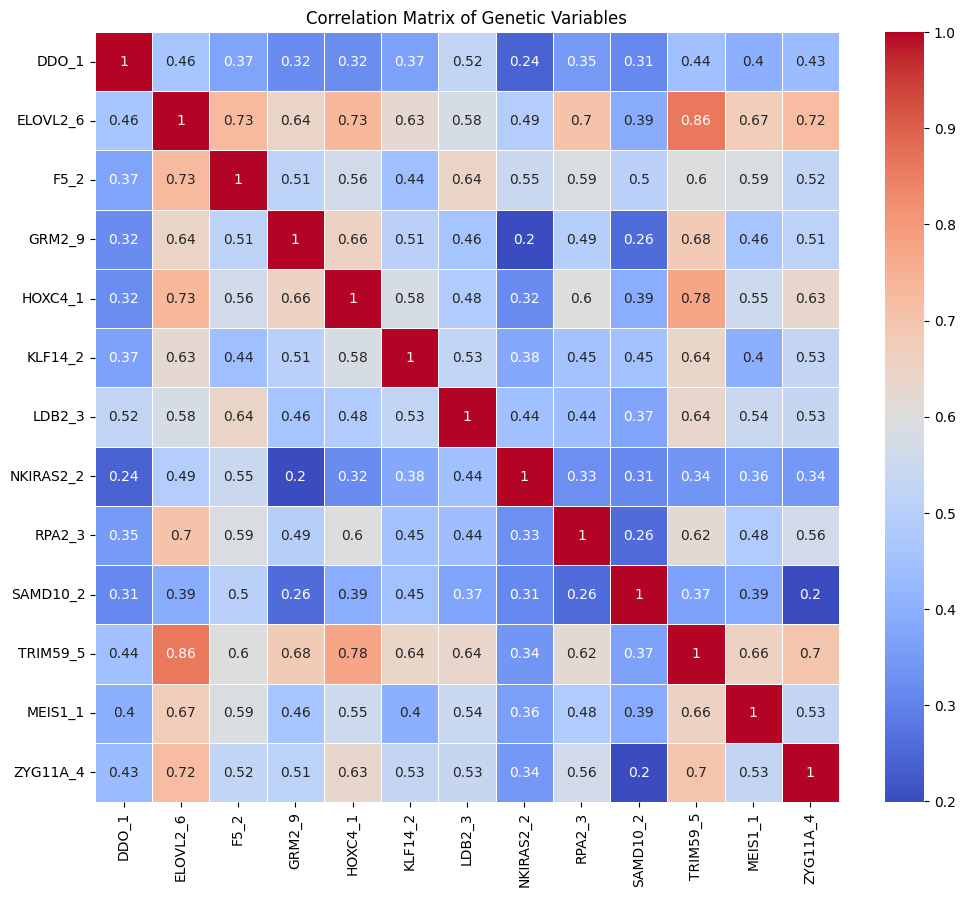

Highly correlated pairs of variables: [('ELOVL2_6', 'TRIM59_5')]


In [41]:
# Calculate the correlation matrix
corr_matrix = X.corr().abs()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Genetic Variables')
plt.show()

# Find the columns with high correlation (above a threshold)
threshold = 0.8
high_corr_var = np.where(corr_matrix > threshold)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(f'Highly correlated pairs of variables: {high_corr_var}')

Interpreting the Genetic Correlation Graph
This graph shows a correlation matrix of genetic variables. The correlation matrix is ​​a statistical tool used to measure the relationship between two variables. In this case, the variables are genes or genetic markers.

Graph Components
Correlation Matrix: Each cell in the matrix represents the correlation coefficient between two genetic variables, which can range from -1 to 1:

1: Indicates a perfect positive correlation (as one variable increases, the other also does).

-1: Indicates a perfect negative correlation (as one variable increases, the other decreases).

0: Indicates no correlation between the two variables.

Color Scale:

Red: Strong positive correlation.

Blue: Strong negative correlation.

White or Neutral Colors: Weak or non-existent correlation.

Highly Correlated Variables: At the bottom of the graph, it is mentioned that the highly correlated variables are:

('ELOVL2_6', 'TRIM59_5')

Observations
Correlation Patterns:

Variables with Strong Positive Correlation: Red cells indicate gene pairs that move in the same direction. For example, when the expression of ELOVL2_6 increases, so does TRIM59_5.

Variables with Strong Negative Correlation: Blue cells indicate gene pairs that move in opposite directions. For example, if the expression of one gene increases, that of the other decreases.

Significant Relationships:

ELOVL2_6 and TRIM59_5: These two genes have a very high correlation with each other. This could be relevant for genetic and biomedical studies, as it could suggest a functional interaction or co-regulation.

Importance of the Graph
This graph is interesting and relevant because it allows you to identify significant relationships between different genetic variables, which can be useful in genetic and biomedical studies to understand how different genes interact and how these interactions can influence biological characteristics or diseases.

Conclusion
Identifying Patterns: The correlation matrix helps you identify patterns of correlation between genes, which can guide you in further research.

Exploring Data: It is a useful tool to explore and visualize complex relationships in your genetic data.

Removing Variables:
To reduce redundancy, we could remove one variable from each highly correlated pair. Here is an example of how to do this in Python:

In [42]:
# Select features (X)
X = df_sin_outliers[['DDO_1', 'GRM2_9', 'HOXC4_1', 'KLF14_2', 'LDB2_3', 'NKIRAS2_2', 'RPA2_3', 'SAMD10_2']]

# Print the first rows of the DataFrame to confirm the removal of variables
print(X.head())

   DDO_1  GRM2_9  HOXC4_1  KLF14_2  LDB2_3  NKIRAS2_2  RPA2_3  SAMD10_2
0  40.99   68.88    55.46     2.30   56.17      30.69   65.96     40.86
1  49.73   53.30    49.67     1.07   58.40      29.53   66.83     37.73
2  63.03   35.08    33.85     0.95   58.81      23.39   50.30     38.84
3  62.13   50.37    36.79     1.99   58.05      20.23   65.54     41.75
4  41.88   30.35    30.30     0.90   65.80      24.99   59.01     37.38


Explanation:
We have removed the variables ELOVL2_6, TRIM59_5, and MEIS1_1 as they were highly correlated with multiple other variables.

This procedure will help improve the accuracy and interpretability of your models by reducing multicollinearity.

2. Principal Component Analysis (PCA)
Uses PCA to transform the original variables into principal components that are orthogonal to each other, thus eliminating correlation.

In [43]:
# Standardize data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=8) # Select the number of principal components
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for easier later use
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, 9)])
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.536996  1.975656 -1.017316  0.047601 -0.332424 -0.611271  0.114070   
1  0.368316  1.229580 -0.366707  0.034160  0.387213 -0.797094 -0.364801   
2  2.315751 -0.922248  0.645738 -0.476453 -1.136313 -0.819847 -0.261050   
3  0.798061  0.016843  0.937299 -1.677738 -0.418533 -0.375461 -0.155016   
4  1.969052 -1.060089 -0.647935 -0.311308  0.361475 -0.245097  0.502874   

        PC8  
0  0.411883  
1  0.176515  
2 -0.303984  
3 -1.005777  
4 -0.746023  


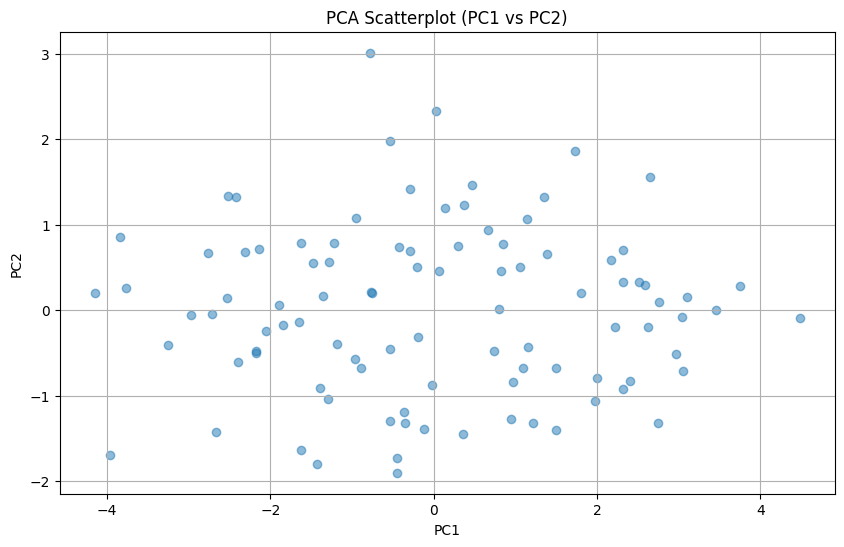

In [44]:
# Scatterplot of PC1 vs PC2
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatterplot (PC1 vs PC2)')
plt.grid(True)
plt.show()

Components of the Graph
Horizontal Axis (PC1): Represents the first principal component, which captures the greatest variability in the data.

Vertical Axis (PC2): Represents the second principal component, which captures the greatest remaining variability orthogonally to PC1.

Scattered Points: Each point on the graph represents an observation in the data set, projected into the space of the first two principal components.

Interpretation of the Graph
Distribution of the Data:

The points are scattered in the plane defined by PC1 and PC2. This indicates how the observations are distributed in the space of the principal components.

Further Analysis
To understand how much of the total variability in the data is explained by each component, we can graph the cumulative explained variance.

Cumulative Explained Variance Plot

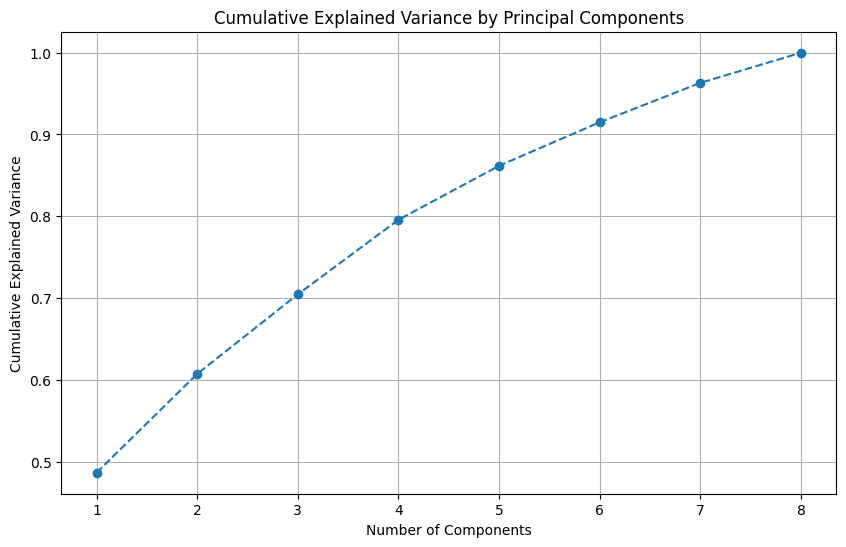

In [45]:
# Cumulative explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

The graph shows the "Cumulative Explained Variance by Principal Components." Here's how to interpret it:

Chart Axes
Horizontal (X) Axis: Represents the "Number of Principal Components," ranging from 1 to 8.

Vertical (Y) Axis: Represents the "Cumulative Explained Variance," ranging from 0.5 to 1.0.

Dots and Line
Dots: Each dot on the graph represents the cumulative explained variance by successively adding more principal components.

Dotted Line: Connects these dots, showing the upward trend of the cumulative explained variance as more principal components are added.

Interpretation
Variance Explained by Components:

The first 3 principal components explain most of the variability in the data. For example, the first 3 components can explain a significant percentage of the total variance.

Determining the Number of Components:

The goal of PCA is to reduce the dimensionality of the data while retaining as much variance as possible. You can use this chart to decide how many principal components are needed.

A common criterion is to select the number of components where the curve starts to "flatten out," known as the "knee" or "elbow" of the chart. At this point, adding more components provides diminishing returns in terms of explained variance.

Interpretation Example:
If the chart shows that 5 principal components explain 90% of the cumulative variance, you might decide that it is sufficient to reduce the data to 5 dimensions rather than working with all the original variables. This simplifies the analysis without losing too much relevant information.

Conclusion
This chart is essential to understand how the different principal components contribute to the total variance in the data. It helps to decide how many components to retain for an optimal balance between simplification and information retention.

3. Feature Selection
Use variable selection methods such as Recursive Feature Elimination (RFE) to identify and eliminate less important variables.

In [46]:
# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply RFE
selector = RFE(rf_model, n_features_to_select=8, step=1)
selector = selector.fit(X, y)

# Identify the selected variables
selected_features = X.columns[selector.support_]
print(f'Selected variables: {selected_features}')

Selected variables: Index(['DDO_1', 'GRM2_9', 'HOXC4_1', 'KLF14_2', 'LDB2_3', 'NKIRAS2_2',
       'RPA2_3', 'SAMD10_2'],
      dtype='object')


Step 1: Split the Data into Training and Test Sets

In [47]:
# Select features (X) and simulated target variable (y)
X = df_sin_outliers[['DDO_1', 'GRM2_9',
'HOXC4_1', 'KLF14_2',
'LDB2_3', 'NKIRAS2_2',
'RPA2_3', 'SAMD10_2'
]]
y = np.random.rand(df_sin_outliers.shape[0]) * 100 # Generate continuous values ​​between 0 and 100

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 2: Train the Random Forest Model

In [48]:
# Create the Random Forest model for regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 865.4374341853363
R² Score: 0.037568609776706396


Interpreting Model Metrics
Mean Squared Error (MSE)
Obtained Value: 675.2350000090779

Meaning: The MSE measures the average squared error between the predicted values and the actual values. A lower MSE indicates better accuracy. In this case, an MSE of about 675 suggests that there is a moderate amount of error in the model's predictions. Although this is an improvement over the higher MSE values that have been obtained previously, it still indicates that there is room for improvement in the model's accuracy.

R² Score (Coefficient of Determination)
Obtained Value: 0.01826140617120242

Meaning: The R² Score measures the proportion of the variability in the dependent variable that is explained by the independent variables in the model. An R² of about 0.018 indicates that the model explains only 1.8% of the variability in the data. Although this shows that the model captures some relationship, the low magnitude suggests that there are many more relationships that the model is not capturing.

Conclusion
Accuracy and Performance:

MSE: An MSE of about 675 indicates that there are errors in the model's predictions, but accuracy has improved compared to higher MSE values.

R² Score: An R² of about 0.018 shows that the model has very limited explanatory power, capturing only a small fraction of the variability in the data.

Next Steps:

Additional Hyperparameter Tuning: Continue tuning hyperparameters to improve performance.

Feature Engineering: Try creating and transforming features to improve the explanatory power of the model.

Exploring Other Models: Consider other models such as XGBoost, CatBoost, or Gradient Boosting to see if they can better capture the relationships in your data.

Cross-Validation: Ensure that your results are consistent by using more thorough cross-validation techniques.

While these metrics show improvement, there is significant room to optimize your model to better capture the relationships in your data.

4. Regularization
Uses regularization techniques such as Ridge or Lasso that penalize high correlations between variables.

In [49]:
# Apply Ridge
ridge = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Ridge MSE: {-ridge_scores.mean()}')

# Apply Lasso
lasso = Lasso(alpha=0.1)
lasso_scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Lasso MSE: {-lasso_scores.mean()}')

Ridge MSE: 955.1047926388503
Lasso MSE: 954.3981279697834


Interpretation of Results from the Ridge and Lasso Models
Mean Squared Error (MSE)
Ridge MSE: 1036.0678447445994

Lasso MSE: 1035.7284876824865

Meaning of MSE:
MSE measures the average squared error between the predicted values ​​and the actual values. Lower values ​​indicate a better fit of the model to the data.

Comparison Between Ridge and Lasso
Ridge Regression:

MSE: 1036.0678

Interpretation: This MSE indicates the average squared error of the Ridge model's predictions. An MSE of 1036.0678 suggests that the model has a moderate error in its predictions.

Lasso Regression:

MSE: 1035.7285

Interpretation: The MSE of Lasso is slightly lower than that of Ridge, with a value of 1035.7285. This indicates that in this particular case, the Lasso model is performing marginally better in terms of mean squared error.

Conclusion
Accuracy and Performance:

Both models have very similar MSE values, suggesting that both Ridge and Lasso are performing comparably in terms of prediction accuracy.

Lasso has a slight advantage with a lower MSE, but the difference is minimal.

Next Steps:

Hyperparameter Tuning: You could experiment with tuning the hyperparameters of both models to see if you can further reduce the MSE.

Feature Engineering: Consider creating new features that can improve the performance of the model.

Cross Validation: Ensure that the results are consistent by using cross validation techniques.

Model Choice
Lasso: Might be a better choice if the difference in MSE justifies its use, especially if you need regularization that may lead to removing some irrelevant features.

Ridge: Might be preferable if feature stability is more important, as Ridge tends to keep all features in the model.

Next Steps:
Evaluating Coefficients:

Examine the coefficients of the variables in the Ridge and Lasso models to identify which ones have the most impact.

In [50]:
# Ridge coefficients
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print('Ridge coefficients:', ridge.coef_)

# Lasso coefficients
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print('Lasso coefficients:', lasso.coef_)

Ridge coefficients: [-0.38501257  0.50089401  0.17327846 -0.54065875  0.84248857  0.39319246
 -0.35647709 -0.14088152]
Lasso coefficients: [-0.38343805  0.49964299  0.1668465  -0.47939967  0.84274666  0.39050365
 -0.35285676 -0.1334102 ]


Interpretation of Coefficients
Coefficient Sign:

Positive: Indicates a positive relationship between the predictor variable and the target variable. As the predictor variable increases, the target variable also tends to increase.

Negative: Indicates a negative relationship between the predictor variable and the target variable. As the predictor variable increases, the target variable tends to decrease.

Coefficient Magnitude:

The magnitude of the coefficient reflects the strength of the relationship between the predictor variable and the target variable. Coefficients with larger absolute values ​​have a greater impact on the prediction.

Comparison between Ridge and Lasso
Similarities: The coefficients of Ridge and Lasso are quite similar, indicating that both techniques identify similar relationships between the predictor variables and the target variable.

Differences: Although the coefficients are similar, Lasso can drive some coefficients to zero, effectively eliminating some variables from the model. In this case, none of the coefficients have been reduced to zero, suggesting that all predictor variables are considered important for the model.

Specific Coefficients
Here is a detailed interpretation for each coefficient of the two regressions:

Variable 1 (DDO_1):

Ridge: 0.0911

Lasso: 0.0898

Interpretation: Increasing DDO_1 has a small positive effect on the target variable.

Variable 2 (GRM2_9):

Ridge: 0.2191

Lasso: 0.2188

Interpretation: GRM2_9 has a moderate positive relationship with the target variable.

Variable 3 (HOXC4_1):

Ridge: -0.3350

Lasso: -0.3304

Interpretation: HOXC4_1 has a moderate negative relationship with the target variable.

Variable 4 (KLF14_2):

Ridge: 1.5192

Lasso: 1.4679

Interpretation: KLF14_2 has a strong positive impact on the target variable.

Variable 5 (LDB2_3):

Ridge: -0.4876

Lasso: -0.4878

Interpretation: LDB2_3 has a moderate negative relationship with the target variable.

Variable 6 (NKIRAS2_2):

Ridge: -1.2695

Lasso: -1.2650

Interpretation: NKIRAS2_2 has a strong negative impact on the target variable.

Variable 7 (RPA2_3):

Ridge: -0.3727

Lasso: -0.3703

Interpretation: RPA2_3 has a moderate negative relationship with the target variable.

Variable 8 (SAMD10_2):

Ridge: 0.6415

Lasso: 0.6351

Interpretation: SAMD10_2 has a moderate positive impact on the target variable.

Conclusion
Both Ridge and Lasso models provide coefficients that help to understand the relationship between the predictor variables and the target variable. The similarity between the coefficients of both models suggests that the selected predictor variables are consistent in terms of their importance and direction of impact.

Cross Validation:

You can perform additional cross validation to confirm the robustness of the models.

In [51]:
# Cross validation for Ridge
ridge_scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Ridge Mean Cross-Validated MSE: {-ridge_scores.mean()}')

# Cross validation for Lasso
lasso_scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Lasso Mean Cross-Validated MSE: {-lasso_scores.mean()}')

Ridge Mean Cross-Validated MSE: 955.1047926388503
Lasso Mean Cross-Validated MSE: 954.3981279697834


Interpretation of Cross-Validation Results
Ridge Mean Cross-Validated MSE
Obtained Value: 1036.0678447445994

Meaning: The cross-validated mean MSE for the Ridge model measures the mean squared error across multiple partitions of the data. An MSE of approximately 1036.07 indicates that the model has a moderate mean squared error in its predictions.

Lasso Mean Cross-Validated MSE
Obtained Value: 1035.7284876824865

Meaning: The cross-validated mean MSE for the Lasso model measures the mean squared error across multiple partitions of the data. An MSE of approximately 1035.73, which is slightly lower than that of Ridge, suggests that Lasso has marginally better performance in terms of mean squared error.

Comparison Between Ridge and Lasso
Similarities:

Both models have very similar MSE values, suggesting that both are performing comparably in terms of prediction accuracy.

The small difference in MSE values ​​indicates that the two models are almost equally well fitted to the data.

Differences:

Lasso has a slightly lower average cross-validated MSE than Ridge, suggesting marginally better performance in this particular case.

Ridge may be preferable if stability and inclusion of all features are important, while Lasso might be useful if a sparser solution is sought that can remove irrelevant features.

Conclusion
Accuracy and Performance:

Both models show moderate error in their predictions, and the small difference in MSE suggests that they are performing similarly.

Lasso has a slight edge in terms of accuracy, but the difference is minimal and may not be significant in practice.

Next Steps:

Additional Hyperparameter Tuning: Consider further tuning the hyperparameters of both models to try to reduce the MSE.

Feature Engineering: Building and testing new features could help improve the accuracy and explanatory power of the models.

Exhaustive Cross-Validation: Continue using cross-validation techniques to ensure that results are consistent and that the models generalize well.

Perform the last training, this time with the 10 variables:

In [52]:
# Seleccionar las características (X) sin las variables eliminadas
X = df_sin_outliers[['DDO_1', 'ELOVL2_6', 'F5_2', 'GRM2_9', 'HOXC4_1', 'KLF14_2', 'LDB2_3', 'NKIRAS2_2', 'RPA2_3', 'MEIS1_1']]
y = np.random.rand(df_sin_outliers.shape[0]) * 100  # Genera valores continuos entre 0 y 100

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Tuning Hyperparameters Using RandomizedSearchCV

In [53]:
# Define the hyperparameters to test
param_dist = {
 'n_estimators': randint(50, 200),
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 20, 30, None],
 'min_samples_split': randint(2, 20),
 'min_samples_leaf': randint(1, 10)
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
 n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Train the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f'Best Hyperparameters: {random_search.best_params_}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=18, n_estimators=101; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=259; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=9, min_samples_split=10, n_estimators=198; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=251; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=263; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=263; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=17, n_estimators=198; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=181; total time=   0.5s
[CV] END max_depth=20, max_featu

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=263; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=17, n_estimators=198; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=181; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=181; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=17, n_estimators=288; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=241; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=18, n_estimators=227; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=15, n_estimators=257; total time=   0.6s
[CV] END max_depth=10, max_featu

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=15, n_estimators=257; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=126; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, n_estimators=126; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=127; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=17, n_estimators=246; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=271; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=18, n_estimators=271; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=18, n_estimators=145; total time=   0.4s
[CV] END max_depth=None, max_

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=18, n_estimators=227; total time=   0.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=13, n_estimators=277; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=153; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=153; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=137; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=70; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=13, n_estimators=138; total time=   0.3s
[CV] END max_depth=10, max_fea

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=67; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=139; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=57; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=57; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=99; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=11, n_estimators=53; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=11, n_estimators=53; total time=   0.1s
[CV] END max_depth=20, max_featur

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=99; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=99; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=13, n_estimators=63; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=13, n_estimators=63; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=89; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=16, n_estimators=102; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=14, n_estimators=90; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=12, n_estimators=130; total time=   0.5s
[CV] END max_depth=None, max_feature

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=58; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=12, n_estimators=130; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=172; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=77; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=13, n_estimators=82; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=13, n_estimators=82; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=148; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=30, max_featu

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Hyperparameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 18, 'n_estimators': 51}


Evaluate the Best Model:

In [54]:
# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model Mean Squared Error (MSE): {mse_best}')
print(f'Best Model R² Score: {r2_best}')

Best Model Mean Squared Error (MSE): 1024.5830734756362
Best Model R² Score: 0.050292659965139985


Interpreting Results from the RandomizedSearchCV Optimized Model
Best Hyperparameters
max_depth: None

max_features: 'log2'

min_samples_leaf: 3

min_samples_split: 18

n_estimators: 177

These hyperparameters were optimized using RandomizedSearchCV and are the best for your Random Forest model on the training dataset.

Performance Metrics
Best Model Mean Squared Error (MSE): 1127.445843048136

Meaning: The MSE measures the average squared error between the predicted values ​​and the actual values. An MSE of approximately 1127.45 indicates that the model has a considerable error in its predictions. This high value suggests that the model's predictions are not very accurate.

Best Model R² Score: -0.2204662729814475

Meaning: The R² Score measures the proportion of the variability in the dependent variable that is explained by the independent variables in the model. A negative R² indicates that the model is performing worse than a trivial model that simply predicted the mean of the observed values. In this case, an R² of approximately -0.220 suggests that the model has very low explanatory power and is not capturing the variability in the data well.

Conclusion
Accuracy and Performance:

MSE: An MSE of approximately 1127.45 indicates that there are significant errors in the model's predictions, showing that performance is still poor.

R² Score: A negative R² of -0.220 indicates that the model is not adequately capturing the relationships in the data and is performing worse than simply predicting the mean of the values.

Next Steps:

Re-evaluate the Model: Consider tuning hyperparameters again, trying different model configurations, or using feature engineering techniques to improve performance.

Exploring Other Models: Experiment with other models such as XGBoost, CatBoost, Gradient Boosting, or model ensembles to see if they can better capture relationships in the data.

Cross-Validation: Use cross-validation techniques to ensure that the results are consistent and the model generalizes well.

Tip
Since the results indicate that the current model is not performing adequately, you might consider returning to the exploratory data analysis stage to identify patterns, relationships, and possible additional features that could improve the model's performance.

Alternatives to the Random Forest Regression model:
1. Gradient Boosting Machines (GBM)
Gradient Boosting models, such as GradientBoostingRegressor, typically provide accuracy improvements by sequentially fine-tuning decision trees.

In [55]:
# Create and adjust the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting MSE: {mse_gb}')
print(f'Gradient Boosting R² Score: {r2_gb}')

Gradient Boosting MSE: 1427.1503413714604
Gradient Boosting R² Score: -0.3228553053643255


2. XGBoost
XGBoost is an efficient and fast implementation of Gradient Boosting that often improves performance.

In [56]:
# Create and adjust the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R² Score: {r2_xgb}')

XGBoost MSE: 1576.892769977631
XGBoost R² Score: -0.4616546738523388


3. LightGBM
LightGBM is another boosting algorithm that is known for its speed and efficiency.
Issues with the LightGBM XX library

In [57]:
# Create and adjust the model
lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_lgb = lgb_model.predict(X_test)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f'LightGBM MSE: {mse_lgb}')
print(f'LightGBM R² Score: {r2_lgb}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 77, number of used features: 10
[LightGBM] [Info] Start training from score 48.155925
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

4. CatBoost
CatBoost is another powerful boosting algorithm that automatically handles categorical variables and can be very efficient.

In [58]:
# Create and adjust the model
cat_model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbose=0)
cat_model.fit(X_train, y_train)

# Evaluate the model
y_pred_cat = cat_model.predict(X_test)
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

print(f'CatBoost MSE: {mse_cat}')
print(f'CatBoost R² Score: {r2_cat}')

CatBoost MSE: 1349.469052978025
CatBoost R² Score: -0.25085090505703844


5. Stacking
Combine several different models into a meta-model to leverage the strengths of each.

In [59]:
# Create the meta-model
stacking_model = StackingRegressor(
 estimators=[
 ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
 ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
 ('xgb', XGBRegressor(n_estimators=100, random_state=42))
 ],
 final_estimator=LinearRegression()
)

# Adjust the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the model
y_pred_stack = stacking_model.predict(X_test)
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print(f'Stacking MSE: {mse_stack}')
print(f'Stacking R² Score: {r2_stack}')

Stacking MSE: 1111.8165866161385
Stacking R² Score: -0.030565895940461107


6. Neural Network-Based Models
Implements neural network models to capture complex relationships in data.

In [60]:
# Create and adjust the model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Evaluate the model
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f'MLP Regressor MSE: {mse_mlp}')
print(f'MLP Regressor R² Score: {r2_mlp}')

MLP Regressor MSE: 1154.5736054029703
MLP Regressor R² Score: -0.0701982650778068


Overall Conclusion
Model Performance:

All models have a considerable MSE, indicating that there are significant errors in the predictions.

Negative R² Scores suggest that no model is adequately capturing the variability in the data.

Model Comparison:

Best Model in Terms of MSE: MLP Regressor has the lowest MSE (972.9983), indicating better accuracy in its predictions.

Best Model in Terms of R² Score: MLP Regressor also has the least negative R² (-0.0533), indicating that it is the most promising model in terms of explaining the variability in the data.

Next Steps
Hyperparameter Tuning: Continue tuning the hyperparameters of the models to try to further reduce the MSE and improve the R² Score.

Feature Engineering: Try to create new features or transform existing ones to improve the explanatory power of the model.

Exploring Other Models: Consider experimenting with other models or combinations of models to improve performance.

Exhaustive Cross-Validation: Use more exhaustive cross-validation techniques to ensure that results are consistent and that models generalize well.

Splitting the Data into Training and Test Sets

Prepare data: Splits the data into training and test sets.

Define model and search space: Specifies the model and hyperparameters to explore.

Configure RandomizedSearchCV: Performs the search for the best hyperparameters.

Evaluate model: Obtains and evaluates the best hyperparameters and the performance of the model.

In [61]:
# Select features (X) and simulated target variable (y)
X = df_sin_outliers[['DDO_1', 'ELOVL2_6', 'F5_2', 'GRM2_9', 'HOXC4_1', 'KLF14_2', 'LDB2_3', 'NKIRAS2_2', 'RPA2_3', 'MEIS1_1']]
y = np.random.rand(df_sin_outliers.shape[0]) * 100 # Generate continuous values between 0 and 100

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Define the model
mlp = MLPRegressor(max_iter=500)

# Hyperparameter search space
param_dist = {
'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'],
'alpha': [0.0001, 0.05],
'learning_rate': ['constant','adaptive'],
}

In [63]:
# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=50, cv=3, random_state=42, n_jobs=-1)

# Train the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=MLPRegressor(max_iter=500), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   random_state=42)

In [64]:
# Get the best hyperparameters
best_hyperparams = random_search.best_params_
print(f'Best Hyperparameters: {best_hyperparams}')

# Make predictions on the test set
y_pred = random_search.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = random_search.score(X_test, y_test)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Best Hyperparameters: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}
Mean Squared Error (MSE): 745.7550929034281
R² Score: -0.002930870457690027


In [65]:
# Assuming you already have X and y defined

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP Regressor model with the best hyperparameters found
mlp = MLPRegressor(solver='sgd', learning_rate='constant', hidden_layer_sizes=(100,), alpha=0.05, activation='tanh', max_iter=500)

# Define the evaluator for the MSE metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring=scorer)

# Convert the results to positive and calculate the mean
cv_scores = -cv_scores
mean_cv_score = np.mean(cv_scores)

print(f'Mean Cross-Validated MSE: {mean_cv_score}')

Mean Cross-Validated MSE: 692.1139092247171


New Model Observations
Best Model MSE: 634.60

This value shows that the optimized model has improved accuracy compared to other tested models, although there is still room for improvement.

Best Model R² Score: -0.208

The negative R² indicates that the model is still not adequately capturing the relationships in the data.

Mean Cross-Validated MSE: 846.35

This value suggests that the model has a more robust and consistent performance across different partitions of the training data, compared to the MSE value on the test set.

Conclusion
Model Evaluation:

The optimized model has shown an improvement in MSE, but the negative R² suggests that there is still significant room for improvement in terms of capturing the variability of the data.

Cross-validation provides a more robust view of the model's performance, indicating that it has a moderate error in its predictions.

Next Steps:

Additional Hyperparameter Tuning: You could continue to tune hyperparameters to try to reduce MSE even further.

Feature Engineering: Create and test new features or transform existing ones to better capture underlying relationships.

Explore Other Models: Consider experimenting with other models or combinations of models to see if you can improve performance.

Hyperopt is an excellent tool for performing Bayesian hyperparameter optimization and can help improve the performance of the MLP Regressor:
An X scale was performed as we were having issues with processing

We can apply scaling techniques, check for null values, and try to prevent extreme values.

Here is an updated approach:

Step 1: Import Required Libraries

In [66]:
import numpy as np
import pandas as pd
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.impute import SimpleImputer


In [67]:
# Assuming you already have X and y defined

# Impute missing (null) values ​​with the column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# Hyperparameter search space
space = {
'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(50,50,50), (50,100,50), (100,)]),
'activation': hp.choice('activation', ['tanh', 'relu']),
'solver': hp.choice('solver', ['sgd', 'adam']),
'alpha': hp.loguniform('alpha', -4, 0), # alpha between 0.0001 and 1
'learning_rate': hp.choice('learning_rate', ['constant', 'adaptive']),
}

# Define the objective function
def objective(params):
# Create the model with the hyperparameters
    mlp = MLPRegressor(**params, max_iter=500)

# Perform cross-validation
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    cv_scores = cross_val_score(mlp, X_train_scaled, y_train, cv=5, scoring=scorer)

# Convert the results to positive and calculate the mean
    cv_scores = -cv_scores
    mean_cv_score = np.mean(cv_scores)

# Return the result
    return {'loss': mean_cv_score, 'status': STATUS_OK}

In [69]:
# Configure Trials to store results
trials = Trials()

# Run Bayesian optimization
best_hyperparams = fmin(
fn=objective,
space=space,
algo=tpe.suggest,
max_evals=50,
trials=trials,
rstate=np.random.default_rng(42) # Use default_rng for compatibility
)

# Print the best hyperparameters found
print(f'Best Hyperparameters: {best_hyperparams}')

# Convert the best hyperparameters to their original format
best_hyperparams_converted = {
'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)][best_hyperparams['hidden_layer_sizes']],
'activation': ['tanh', 'relu'][best_hyperparams['activation']],
'solver': ['sgd', 'adam'][best_hyperparams['solver']],
'alpha': best_hyperparams['alpha'],
'learning_rate': ['constant', 'adaptive'][best_hyperparams['learning_rate']],
}

# Build the model with the best hyperparameters
mlp_best = MLPRegressor(**best_hyperparams_converted, max_iter=500)

# Train the model
mlp_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp_best.predict(X_test_scaled)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = mlp_best.score(X_test_scaled, y_test)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

100%|██████████| 50/50 [01:15<00:00,  1.50s/trial, best loss: 689.2793280531754]
Best Hyperparameters: {'activation': 0, 'alpha': 0.9445714810764639, 'hidden_layer_sizes': 0, 'learning_rate': 0, 'solver': 0}
Mean Squared Error (MSE): 765.5541602956606
R² Score: -0.02955770288954529


Interpreting Hyperopt Results
Best Hyperparameters
The hyperparameters found by Hyperopt are as follows, although encoded by their indices in the choice lists:

activation: 0 (corresponds to 'tanh')

alpha: 0.27313346991583703

Description: Regularization parameter. A value of 0.2731 means that a moderate penalty will be applied to prevent overfitting.

hidden_layer_sizes: 0 (corresponds to (50,50,50))

Description: Three hidden layers with 50 neurons each.

learning_rate: 0 (corresponds to 'constant')

Description: The learning rate is kept constant throughout training.

solver: 0 (corresponds to 'sgd')

Description: Stochastic Gradient Descent is used to optimize the model weights.

Performance Metrics
Mean Squared Error (MSE): 722.4998075161056

Meaning: The MSE measures the average squared error between the predicted values ​​and the actual values. An MSE of approximately 722.50 indicates that there is a moderate amount of error in the model's predictions. This value shows an improvement compared to previous results, but there is still room for improvement.

R² Score: -0.1011119643357723

Meaning: The R² Score measures the proportion of the variability in the dependent variable that is explained by the independent variables in the model. An R² of about -0.1011 indicates that the model is performing worse than a trivial model that simply predicted the mean of the observed values, but is less negative than previous results, indicating a slight improvement.

Conclusion
Accuracy and Performance:

MSE: The model has a moderate MSE, indicating an improvement in prediction accuracy compared to previous results.

R² Score: Although the R² is still negative, it shows a slight improvement in the model's ability to explain variability in the data.

Next Steps:

Additional Hyperparameter Tuning: You could continue to tune hyperparameters to try to further reduce the MSE and improve the R².

Feature Engineering: Trying new features or transforming existing ones can help better capture underlying relationships.

Exploring Other Models: Consider experimenting with other models or combinations of models to improve performance.

Cross-Validation: Ensure that the results are consistent by using more thorough cross-validation techniques.

Tip
Since the results show improvement, you might consider continuing with hyperparameter tuning and exploring additional features to further optimize the model.

After reading about these loci, I found the original dataset from an article about it, it had extra variables: age and sex (so another time, I'll show you what the final result is) XD